# <b><u> Predicting the news popularity in multiple social media platforms. </u></b>

## <b> Problem Description </b>

### This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.


###**Approaches used:**

- Popularity prediction
- Sentiment Analysis

# **Conecting to drive**
---

In [120]:
from google.colab import drive

drive.mount("/content/Drive")

Mounted at /content/Drive


In [121]:
import os

# Mount your Google Drive to access files stored there
drive.mount('/content/drive')

# Replace 'your_file_name.csv' with the actual name of your file.
file_name = 'News_Final.csv'

# Set the root directory to your Google Drive
root_dir = '/content/drive/My Drive/'

# Function to recursively search for the file in all directories and subdirectories
def find_file(directory):
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isfile(item_path) and item == file_name:
            return directory
        elif os.path.isdir(item_path):
            result = find_file(item_path)
            if result:
                return result
    return None

# Call the function to find the file directory
file_directory = find_file(root_dir)

# Print the file directory
if file_directory:
    print("File directory:", file_directory)
else:
    print("File not found in Google Drive.")

Mounted at /content/drive
File directory: /content/drive/My Drive/AI_Desicion_Scineces2_endterm


In [122]:
os.chdir('/content/drive/My Drive/AI_Desicion_Scineces2_endterm')

# **Importing Libraries**
---

In [123]:
#@title

import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Sklearn Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor


# Model Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Miscellaneous Libraries
from datetime import datetime
import time
import calendar
import random

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import IPython

import warnings
warnings.filterwarnings('ignore')

# **Reading Datasets**
---

Let's read the datasets we have to work on! We have 4 Social Media feedback datasets of each dependent variable, i.e. in total we have 12 time-series datasets and 1 news data set.

In [124]:
sources= ['Facebook', 'GooglePlus', 'LinkedIn']
topics = ['Economy','Microsoft', 'Obama', 'Palestine']

folder_path = '/content/drive/My Drive/AI_Desicion_Scineces2_endterm/Data/'

master_df = pd.read_csv(folder_path+'News_Final.csv')
df = {}
for source in sources:
  for topic in topics:
    file_name = f'{source}_{topic}.csv'
    file_path = f'{folder_path}{file_name}'
    df[f'{source}_{topic}'] = pd.read_csv(file_path)

### **Datasets:**
- Social Media Feedback Datasets (12 Datasets)
- News Dataset

## **1. Social Media Feedback Datasets (12 Datasets)**
---

- These datasets have popularities of news upon every 20 minutes of publication.

- It consists of 145 columns and N rows, where N is the number of news appeared on that particular social media platform and of that particular topic.

### **Columns:**

> **IDLink:** Unique identifier of news item.

> **TS1:** Popularity level in time slice 1 (0-20 minutes upon publication)

> **TS2:** Popularity level in time slice 2 (20-40 minutes upon publication)

....

> **TS144:** Final level of popularity after 2 days upon publication.

*Let's have a look into one of those datasets*

In [125]:
df['Facebook_Microsoft'].head()

IDLink  TS1  TS2  TS3  TS4  TS5  TS6  TS7  TS8  TS9  ...  TS135  TS136  \
0     101   -1   -1   -1   -1   -1   30   30   30   30  ...    131    131   
1     102   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     57     57   
2     103   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...    259    259   
3     104   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     13     13   
4     105   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...    314    314   

   TS137  TS138  TS139  TS140  TS141  TS142  TS143  TS144  
0    131    131    131    131    131    131    133    133  
1     57     57     57     57     57     58     58     58  
2    260    260    260    260    261    262    262    263  
3     13     13     13     13     13     13     13     13  
4    315    315    316    316    316    316    316    316  

[5 rows x 145 columns]

In [126]:
df['Facebook_Microsoft'].tail()

IDLink  TS1  TS2  TS3  TS4  TS5  TS6  TS7  TS8  TS9  ...  TS135  TS136  \
18526   58442   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     22     22   
18527   58443   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...      1      1   
18528   58448   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...     37     37   
18529   58449   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...      0      0   
18530   58450   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...      8      8   

       TS137  TS138  TS139  TS140  TS141  TS142  TS143  TS144  
18526     22     22     22     22     22     22     22     22  
18527      1      1      1      1      1      1      1      1  
18528     37     37     37     37     37     37     37     37  
18529      0      0      0      0      0      0      0      0  
18530      8      8      8      8      8      8      8      8  

[5 rows x 145 columns]

In [127]:
# Checking Null values
for d in df:
    print(f'Null Values of {d}:',sum(df[d].isna().sum()))

Null Values of Facebook_Economy: 0
Null Values of Facebook_Microsoft: 0
Null Values of Facebook_Obama: 0
Null Values of Facebook_Palestine: 0
Null Values of GooglePlus_Economy: 0
Null Values of GooglePlus_Microsoft: 0
Null Values of GooglePlus_Obama: 0
Null Values of GooglePlus_Palestine: 0
Null Values of LinkedIn_Economy: 0
Null Values of LinkedIn_Microsoft: 0
Null Values of LinkedIn_Obama: 0
Null Values of LinkedIn_Palestine: 0


### **Observations:**
---
- All other datasets are similar to the dataset shown above.
- They have no null values.
- TS144 is the dependent variable of the news dataset.
- 0 level of popularity means the news item has landed the platform but is not at all popular as of now.

## **2. News Dataset**
---
This dataset contains all the information related to the news item. It consist of 93239 rows and 11 columns.


### **Columns:**

> **IDLink:** Unique identifier of news item.

> **Title:** Title of the news item.

> **Headline:** Headline of the news item.

> **Source:** Original news outlet that published the news item.

> **Topic:** Topic of the news item.

> **PublishDate:** Date on which the news item got published.

> **SentimentTitle:** It is the sentiment title score.

> **SentimentHeadline:** It is the sentiment headline score.

> **Dependent Variables:**

- **Facebook:** Popularity after 2 days on Facebook platform upon publication.

- **GooglePlus:** Popularity after 2 days on GooglePlus platform upon publication.

- **LinkedIn:** Popularity after 2 days on LinkedIn platform upon publication.

In [128]:
# news_df = pd.read_csv(folder_path+'News_Final.csv')

# Read the csv file and convert it to DataFrame
news_df = pd.read_csv('News_Final.csv')

master_df = news_df.copy()
master_df.head()

IDLink                                              Title  \
0  99248.0   Obama Lays Wreath at Arlington National Cemetery   
1  10423.0        A Look at the Health of the Chinese Economy   
2  18828.0   Nouriel Roubini: Global Economy Not Back to 2008   
3  27788.0                          Finland GDP Expands In Q4   
4  27789.0  Tourism, govt spending buoys Thai economy in J...   

                                            Headline  \
0  Obama Lays Wreath at Arlington National Cemete...   
1  Tim Haywood, investment director business-unit...   
2  Nouriel Roubini, NYU professor and chairman at...   
3  Finland's economy expanded marginally in the t...   
4  Tourism and public spending continued to boost...   

                                     Source    Topic          PublishDate  \
0                                 USA TODAY    obama  2002-04-02 00:00:00   
1                                 Bloomberg  economy  2008-09-20 00:00:00   
2                                 Bloomberg  economy  2012-01-28 00:00:00   
3                                  RTT News  economy  2015-03-01 00:06:00   
4  The Nation - Thailand&#39;s English news  economy  2015-03-01 00:11:00   

   SentimentTitle  SentimentHeadline  Facebook  GooglePlus  LinkedIn  
0        0.000000          -0.053300        -1          -1        -1  
1        0.208333          -0.156386        -1          -1        -1  
2       -0.425210           0.139754        -1          -1        -1  
3        0.000000           0.026064        -1          -1        -1  
4        0.000000           0.141084        -1          -1        -1

In [129]:
master_df.tail()

IDLink                                              Title  \
93234   61851.0  Stocks rise as investors key in on US economy ...   
93235   61865.0  Russian PM proposes to use conservative and to...   
93236  104793.0  Palestinian Government Uses Foreign Aid To Pay...   
93237  104794.0  Palestine Youth Orchestra prepares for first U...   
93238   61870.0  Sausalito businesswoman wins $10000 in Microso...   

                                                Headline          Source  \
93234  The June employment report is viewed as a cruc...     MarketWatch   
93235  In addition, establish stimulating economic po...            TASS   
93236  The Palestinian government spends nearly $140 ...    Daily Caller   
93237  Palestine Youth Orchestra prepares for first U...    Ahram Online   
93238  Goldstein, the proprietor of the TG Travel Gro...  East Bay Times   

           Topic          PublishDate  SentimentTitle  SentimentHeadline  \
93234    economy  2016-07-07 15:31:05        0.104284           0.044943   
93235    economy  2016-07-07 15:31:10        0.072194           0.000000   
93236  palestine  2016-07-07 15:38:26        0.291667          -0.139754   
93237  palestine  2016-07-07 15:59:22        0.121534           0.092313   
93238  microsoft  2016-07-07 16:16:11        0.000000           0.054554   

       Facebook  GooglePlus  LinkedIn  
93234        -1           3         5  
93235        -1           0         1  
93236         5           1         0  
93237         0           0         0  
93238        -1           1         0

In [130]:
master_df.shape

(93239, 11)

In [131]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [132]:
master_df.describe()

IDLink  SentimentTitle  SentimentHeadline      Facebook  \
count   93239.000000    93239.000000       93239.000000  93239.000000   
mean    51560.653257       -0.005411          -0.027493    113.141336   
std     30391.078704        0.136431           0.141964    620.173233   
min         1.000000       -0.950694          -0.755433     -1.000000   
25%     24301.500000       -0.079057          -0.114574      0.000000   
50%     52275.000000        0.000000          -0.026064      5.000000   
75%     76585.500000        0.064255           0.059709     33.000000   
max    104802.000000        0.962354           0.964646  49211.000000   

         GooglePlus      LinkedIn  
count  93239.000000  93239.000000  
mean       3.888362     16.547957  
std       18.492648    154.459048  
min       -1.000000     -1.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        2.000000      4.000000  
max     1267.000000  20341.000000

### **Observations:**
---
- Title and Headline columns contain textual data. We would require to use TfidfVectorizer or CountVectorizer to deal with them.
- Topic is the categorical column.
- Source and Headline column contains some null values.

## **Data Cleaning**
---
Reformating and cleaning the data for smooth processing!

**Dealing with negative popularities**

- converting negative values to positive by increasing all the levels of popularities by 1.
- to make it easier to handle the data and perform the tasks like: data scaling, predicting, EDA, etc.


In [133]:
social_media_platforms = ['Facebook', 'GooglePlus', 'LinkedIn']

In [134]:
# Increasing Popularity level by 1 to deal with the level -1
for col in sources:
    master_df[col] = master_df[col].apply(lambda x:x+1)

for idf in df:
    for col in df[idf]:
        if col == 'IDLink':
            continue
        df[idf][col] += 1

In [135]:
master_df.describe()

IDLink  SentimentTitle  SentimentHeadline      Facebook  \
count   93239.000000    93239.000000       93239.000000  93239.000000   
mean    51560.653257       -0.005411          -0.027493    114.141336   
std     30391.078704        0.136431           0.141964    620.173233   
min         1.000000       -0.950694          -0.755433      0.000000   
25%     24301.500000       -0.079057          -0.114574      1.000000   
50%     52275.000000        0.000000          -0.026064      6.000000   
75%     76585.500000        0.064255           0.059709     34.000000   
max    104802.000000        0.962354           0.964646  49212.000000   

         GooglePlus      LinkedIn  
count  93239.000000  93239.000000  
mean       4.888362     17.547957  
std       18.492648    154.459048  
min        0.000000      0.000000  
25%        1.000000      1.000000  
50%        1.000000      1.000000  
75%        3.000000      5.000000  
max     1268.000000  20342.000000

In [136]:
df['Facebook_Microsoft'].head()

IDLink  TS1  TS2  TS3  TS4  TS5  TS6  TS7  TS8  TS9  ...  TS135  TS136  \
0     101    0    0    0    0    0   31   31   31   31  ...    132    132   
1     102    0    0    0    0    0    0    0    0    0  ...     58     58   
2     103    0    0    0    0    0    0    0    0    0  ...    260    260   
3     104    0    0    0    0    0    0    0    0    0  ...     14     14   
4     105    0    0    0    0    0    0    0    0    0  ...    315    315   

   TS137  TS138  TS139  TS140  TS141  TS142  TS143  TS144  
0    132    132    132    132    132    132    134    134  
1     58     58     58     58     58     59     59     59  
2    261    261    261    261    262    263    263    264  
3     14     14     14     14     14     14     14     14  
4    316    316    317    317    317    317    317    317  

[5 rows x 145 columns]

In [137]:
# Check Null values
print(master_df.isna().sum())
print(master_df.Source.value_counts()[:3])

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64
Bloomberg    1732
Reuters      1321
ABC News     1098
Name: Source, dtype: int64


### **Dealing with Null/Missing Data**
---
- Source column contains 279 *Null values*. Filling it with the source with maximum publications (i.e. Bloomberg)

- Headline column contains 15 *Null values*. It is very less as compared to number of rows. So, let's drop all the rows that has null values of this column

In [138]:
# Handling Missing Value and Cleaning
master_df['Source'].fillna('Bloomberg', inplace = True)
master_df.dropna(inplace = True)

In [139]:
# Converting source values to lower
# Some source column are present more than once in different letter-case.

print('No. of Distinct Sources in Original Data set:',len(list(master_df['Source'].unique())))
master_df['Source'] = master_df['Source'].apply(lambda x:x.lower())
print('No. of Distinct Sources After Conversion:',len(list(master_df['Source'].unique())))

No. of Distinct Sources in Original Data set: 5755
No. of Distinct Sources After Conversion: 5740


**Working on PublishDate Column**
- Separating the date and the time into separate columns for the ease of working and analysis.

In [140]:
# PublishDate change type to datetime from object
def convert_to_dt(df):
  df['PublishDate'] = pd.to_datetime(df['PublishDate'])
  df['PublishTime'] = df['PublishDate'].dt.time
  df['PublishDate'] = df['PublishDate'].dt.date

convert_to_dt(master_df)

# Extracting Day of the Week
master_df['Weekday'] = master_df.PublishDate.apply(lambda x: calendar.day_name[x.weekday()])

master_df.head()

IDLink                                              Title  \
0  99248.0   Obama Lays Wreath at Arlington National Cemetery   
1  10423.0        A Look at the Health of the Chinese Economy   
2  18828.0   Nouriel Roubini: Global Economy Not Back to 2008   
3  27788.0                          Finland GDP Expands In Q4   
4  27789.0  Tourism, govt spending buoys Thai economy in J...   

                                            Headline  \
0  Obama Lays Wreath at Arlington National Cemete...   
1  Tim Haywood, investment director business-unit...   
2  Nouriel Roubini, NYU professor and chairman at...   
3  Finland's economy expanded marginally in the t...   
4  Tourism and public spending continued to boost...   

                                     Source    Topic PublishDate  \
0                                 usa today    obama  2002-04-02   
1                                 bloomberg  economy  2008-09-20   
2                                 bloomberg  economy  2012-01-28   
3                                  rtt news  economy  2015-03-01   
4  the nation - thailand&#39;s english news  economy  2015-03-01   

   SentimentTitle  SentimentHeadline  Facebook  GooglePlus  LinkedIn  \
0        0.000000          -0.053300         0           0         0   
1        0.208333          -0.156386         0           0         0   
2       -0.425210           0.139754         0           0         0   
3        0.000000           0.026064         0           0         0   
4        0.000000           0.141084         0           0         0   

  PublishTime   Weekday  
0    00:00:00   Tuesday  
1    00:00:00  Saturday  
2    00:00:00  Saturday  
3    00:06:00    Sunday  
4    00:11:00    Sunday

**Date Range restriction**

- It is clearly mentioned in the problem statement that news items in the dataset belongs to a range of dates but we found out that some news items does not belong in the specified dates. So, we are dropping all those rows.


In [141]:
# Handling date range
print('Start Date:',min(master_df['PublishDate']))
print('End Date:',max(master_df['PublishDate']))

# Taking Value between range 2015 Nov to 2016 July
master_df = master_df[(master_df['PublishDate']>=pd.to_datetime('2015-11-01').date()) & (master_df['PublishDate']<=pd.to_datetime('2016-08-01').date())]

print('Start Date:',min(master_df['PublishDate']))
print('End Date:',max(master_df['PublishDate']))

master_df.head()

Start Date: 2002-04-02
End Date: 2016-07-07
Start Date: 2015-11-01
End Date: 2016-07-07


IDLink                                             Title  \
6    80690.0                               Monday, 29 Feb 2016   
31   28854.0      Buffett: Politicians 'Dead Wrong' on Economy   
56   81052.0                               Monday, 29 Feb 2016   
111  80994.0                               Tuesday, 1 Mar 2016   
416    946.0  Microsoft Takes Six Billion Dollars From Android   

                                              Headline  \
6    RAMALLAH, February 25, 2016 (WAFA) - Palestine...   
31   Warren Buffett has a message for presidential ...   
56   RAMALLAH, February 29, 2016 (WAFA) - The Gover...   
111  RAMALLAH, February 29, 2016 (WAFA) - The Gover...   
416  A long time ago, Microsoft MSFT +0.00% purchas...   

                      Source      Topic PublishDate  SentimentTitle  \
6                  bloomberg  palestine  2016-02-28        0.000000   
31   the wall street journal    economy  2016-02-28        0.051031   
56                 bloomberg  palestine  2016-03-01        0.000000   
111                bloomberg  palestine  2016-03-01       -0.243068   
416                   forbes  microsoft  2015-11-01        0.000000   

     SentimentHeadline  Facebook  GooglePlus  LinkedIn PublishTime  Weekday  
6            -0.005906         1           1         1    14:03:00   Sunday  
31           -0.037921         0           0         0    19:17:00   Sunday  
56            0.048546         1           1         1    09:29:00  Tuesday  
111           0.048546         1           1         1    00:15:00  Tuesday  
416           0.115928         0           0         0    00:00:00   Sunday

**Duplicate Rows**
- We have a few duplicate rows as well. Let's drop all those too!

In [142]:
# Dropping Duplicate Rows
print(master_df[master_df.duplicated()])
master_df.drop_duplicates(inplace=True)

        IDLink                                         Title  \
44426  80690.0                           Monday, 29 Feb 2016   
44496  28854.0  Buffett: Politicians 'Dead Wrong' on Economy   
44944  80994.0                           Tuesday, 1 Mar 2016   
45122  81052.0                           Monday, 29 Feb 2016   

                                                Headline  \
44426  RAMALLAH, February 25, 2016 (WAFA) - Palestine...   
44496  Warren Buffett has a message for presidential ...   
44944  RAMALLAH, February 29, 2016 (WAFA) - The Gover...   
45122  RAMALLAH, February 29, 2016 (WAFA) - The Gover...   

                        Source      Topic PublishDate  SentimentTitle  \
44426                bloomberg  palestine  2016-02-28        0.000000   
44496  the wall street journal    economy  2016-02-28        0.051031   
44944                bloomberg  palestine  2016-03-01       -0.243068   
45122                bloomberg  palestine  2016-03-01        0.000000   

       Senti

## **Outlier Treatment and Standardization**
---
- A *density plot* is a representation of the distribution of a numeric variable. It is important for us to understand the distribution so as to take necessary actions.
- Standardization removes the mean and scales each feature/variable to unit variance.
- We are using **StandardScaler** for standardization.
- StandardScaler can be influenced by outliers since it involves the estimation of the empirical mean and standard deviation of each feature. So we will begin with looking for outliers first.

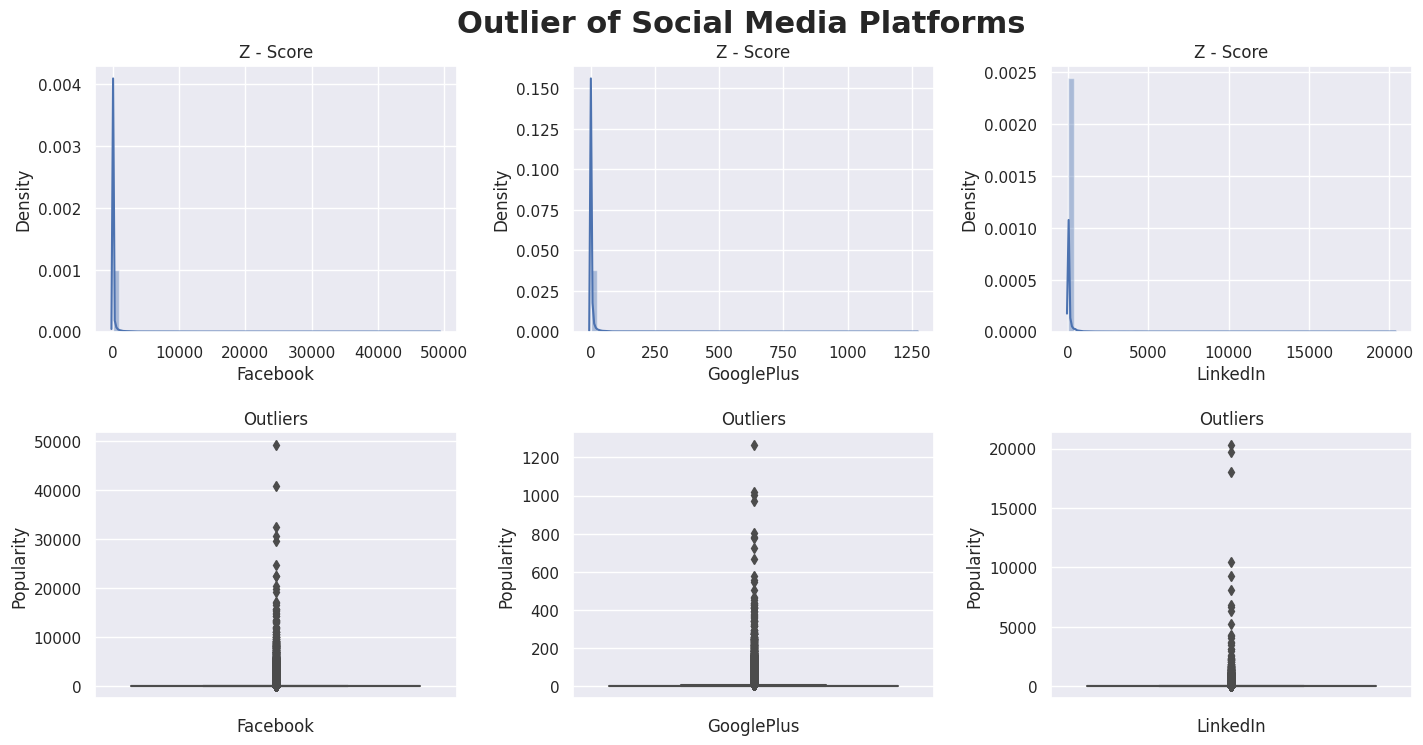

In [143]:
def show_outliers(df, three_d = False):
    fig, axes = plt.subplots(2,3,figsize=(15, 8))
    fig.tight_layout(pad=4.0)
    for source in range(len(social_media_platforms)):
        sns.distplot(ax=axes[0][source],x=df[social_media_platforms[source]])
        axes[0][source].set_xlabel(social_media_platforms[source],fontdict={'fontsize': 12})
        axes[1][source].set_ylabel('Density',fontdict={'fontsize': 12})

        sns.boxplot(ax=axes[1][source],y=df[social_media_platforms[source]] )
        axes[1][source].set_xlabel(social_media_platforms[source],fontdict={'fontsize': 12})
        axes[1][source].set_ylabel('Popularity',fontdict={'fontsize': 12})

        axes[0][source].set_title('Z - Score')
        axes[1][source].set_title('Outliers')

        plt.suptitle('Outlier of Social Media Platforms',fontsize = 22,fontweight = 'bold')

    plt.show()

    if three_d == True:
        fig = px.scatter_3d(df, x='Facebook', y='GooglePlus', z='LinkedIn', title='Dependent Variables')
        fig.show()


show_outliers(master_df, True)

- The Density Plot clearly shows the data is Positively Skewed.
- The box and whisker plot helps observe the outliers
- From the 3-D plot, we can clearly see how dependent features are distributed.

### **Outlier Treatment**
---
Using the ***Quantile Method*** to treat outliers along with the 90 percentile method.

In [144]:
# Computing 90th percentiles and treating the outliers
def outliers_treatment(df, sources):
    for source in sources:
        # tenth_percentile = np.percentile(df[source], 10)
        ninetieth_percentile = np.percentile(df[source], 90)
        # df[source] = np.where(df[source] < tenth_percentile, tenth_percentile, df[source])
        df[source] = np.where(df[source] > ninetieth_percentile, ninetieth_percentile, df[source])

    return df

master_df = outliers_treatment(master_df, social_media_platforms)

### **Standard Scaler Implementation**
---
Applying StandardScaler to standardize data after outlier treatment.

In [145]:
#Standardize data
scaler = StandardScaler()

for source in social_media_platforms:
    master = master_df[source].apply(lambda x:x if x!=(0) else np.nan)
    master_df[f'{source}_scaled'] = scaler.fit_transform(master.values.reshape(-1,1))

    master_df[f'{source}_scaled'].fillna(0,inplace=True) # Reversed our first step.
    master_df[source].fillna(0,inplace=True)

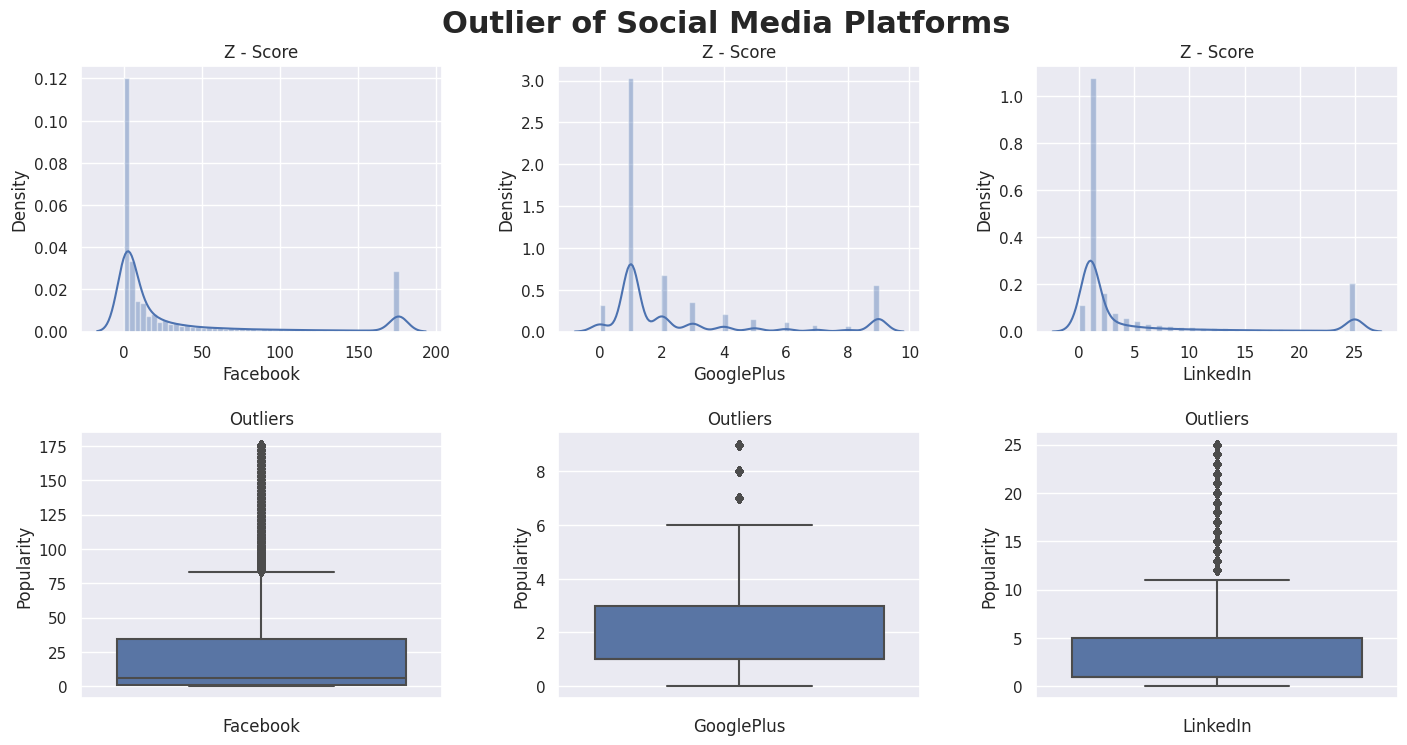

In [146]:
show_outliers(master_df, True)

*Now our dependent features are scaled..!*

In [147]:
master_df.reset_index(inplace=True, drop=True)
master_df.head(2)

IDLink                                         Title  \
0  80690.0                           Monday, 29 Feb 2016   
1  28854.0  Buffett: Politicians 'Dead Wrong' on Economy   

                                            Headline                   Source  \
0  RAMALLAH, February 25, 2016 (WAFA) - Palestine...                bloomberg   
1  Warren Buffett has a message for presidential ...  the wall street journal   

       Topic PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
0  palestine  2016-02-28        0.000000          -0.005906       1.0   
1    economy  2016-02-28        0.051031          -0.037921       0.0   

   GooglePlus  LinkedIn PublishTime Weekday  Facebook_scaled  \
0         1.0       1.0    14:03:00  Sunday         -0.64969   
1         0.0       0.0    19:17:00  Sunday          0.00000   

   GooglePlus_scaled  LinkedIn_scaled  
0          -0.617774        -0.563154  
1           0.000000         0.000000

# **Exploratory Data Analysis**
---

## **Categorizing SentimentTitle and SentimentHeadline**
---
Categorizing the sentiment title and sentiment headline into three different categories based on their sentiment scores:
- Positive
- Negative
- Neutral

In [148]:
master_df['SentimentTitle_Category'] = master_df['SentimentTitle'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')

master_df['SentimentHeadline_Category'] = master_df['SentimentHeadline'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')
master_df.head()

IDLink                                             Title  \
0  80690.0                               Monday, 29 Feb 2016   
1  28854.0      Buffett: Politicians 'Dead Wrong' on Economy   
2  81052.0                               Monday, 29 Feb 2016   
3  80994.0                               Tuesday, 1 Mar 2016   
4    946.0  Microsoft Takes Six Billion Dollars From Android   

                                            Headline                   Source  \
0  RAMALLAH, February 25, 2016 (WAFA) - Palestine...                bloomberg   
1  Warren Buffett has a message for presidential ...  the wall street journal   
2  RAMALLAH, February 29, 2016 (WAFA) - The Gover...                bloomberg   
3  RAMALLAH, February 29, 2016 (WAFA) - The Gover...                bloomberg   
4  A long time ago, Microsoft MSFT +0.00% purchas...                   forbes   

       Topic PublishDate  SentimentTitle  SentimentHeadline  Facebook  \
0  palestine  2016-02-28        0.000000          -0.005906       1.0   
1    economy  2016-02-28        0.051031          -0.037921       0.0   
2  palestine  2016-03-01        0.000000           0.048546       1.0   
3  palestine  2016-03-01       -0.243068           0.048546       1.0   
4  microsoft  2015-11-01        0.000000           0.115928       0.0   

   GooglePlus  LinkedIn PublishTime  Weekday  Facebook_scaled  \
0         1.0       1.0    14:03:00   Sunday         -0.64969   
1         0.0       0.0    19:17:00   Sunday          0.00000   
2         1.0       1.0    09:29:00  Tuesday         -0.64969   
3         1.0       1.0    00:15:00  Tuesday         -0.64969   
4         0.0       0.0    00:00:00   Sunday          0.00000   

   GooglePlus_scaled  LinkedIn_scaled SentimentTitle_Category  \
0          -0.617774        -0.563154                 neutral   
1           0.000000         0.000000                positive   
2          -0.617774        -0.563154                 neutral   
3          -0.617774        -0.563154                negative   
4           0.000000         0.000000                 neutral   

  SentimentHeadline_Category  
0                   negative  
1                   negative  
2                   positive  
3                   positive  
4                   positive

## **Sentiment Headline and Sentiment Title**
---



In [149]:
def show_no_of_news_sentiment_title(df):
    print('******** No. of News items of SentimentTitle ********')
    print(df.SentimentTitle_Category.value_counts(),'\n')

    plt.figure(figsize=(10,8))
    df.SentimentTitle_Category.value_counts().plot(kind='bar')
    plt.title('News Items Distribution of Each Sentiment Title', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Sentiment Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})

def show_no_of_news_sentiment_headline(df):
    print('******** No. of News items of SentimentHeadline ********')
    print(df.SentimentHeadline_Category.value_counts(),'\n')

    plt.figure(figsize=(10,8))
    df.SentimentHeadline_Category.value_counts().plot(kind='bar')
    plt.title('News Items Distribution of Each Sentiment Headline', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Sentiment Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})


******** No. of News items of SentimentTitle ********
negative    37758
positive    36421
neutral     18629
Name: SentimentTitle_Category, dtype: int64 



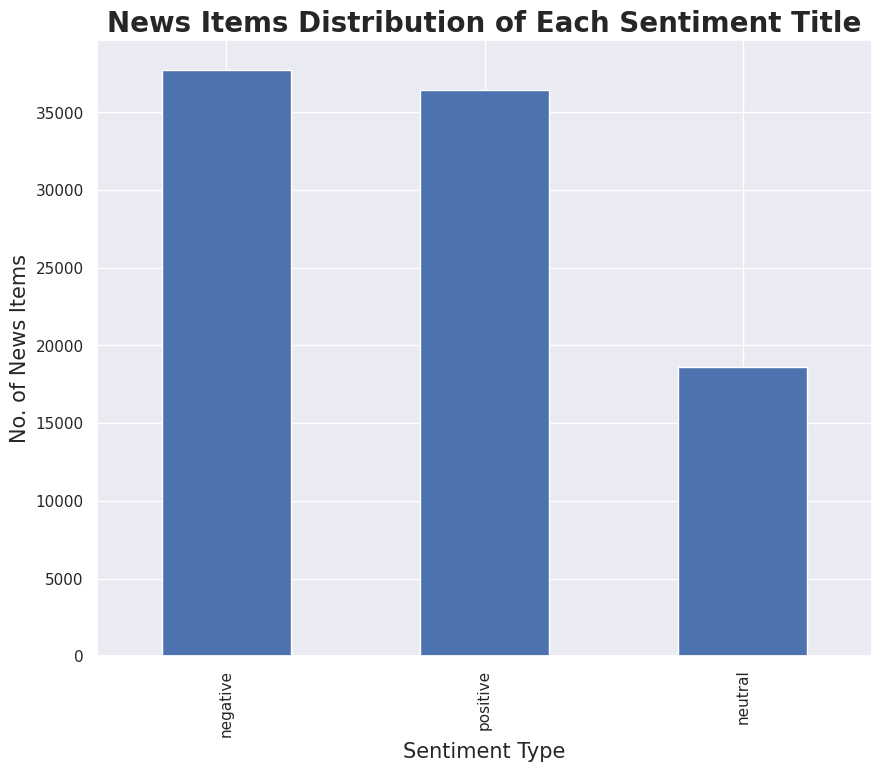

In [150]:
show_no_of_news_sentiment_title(master_df)

******** No. of News items of SentimentHeadline ********
negative    52455
positive    37497
neutral      2856
Name: SentimentHeadline_Category, dtype: int64 



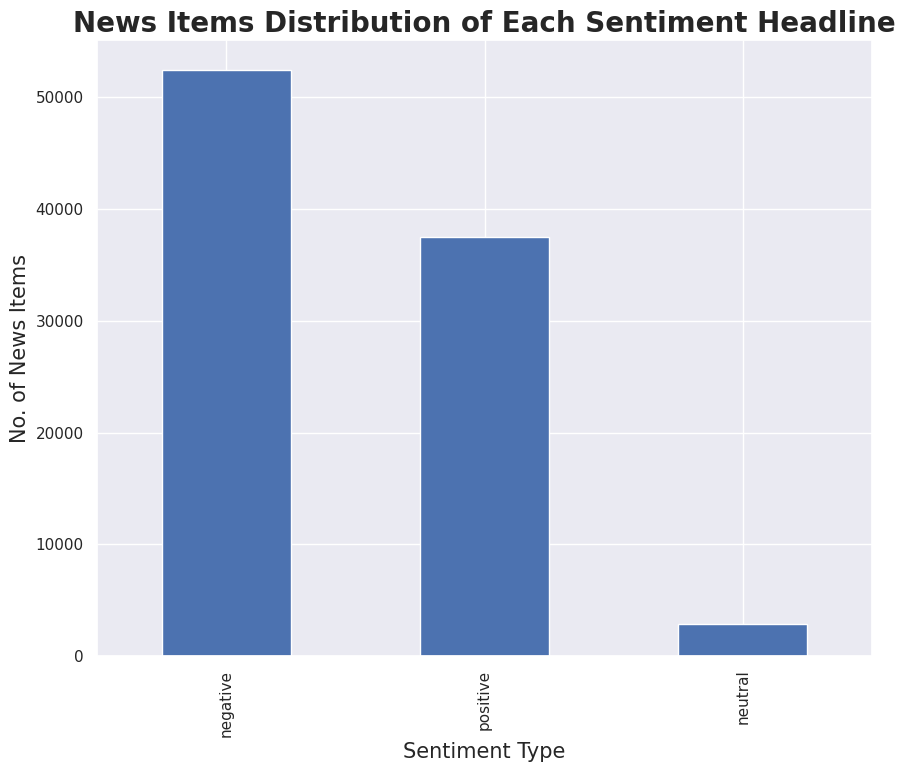

In [151]:
show_no_of_news_sentiment_headline(master_df)

- The two graphs depicts the count of news items falling in each sentiment category.
- We can clearly see that the neutral news items are less as compared to positive and negative news.
- We can also conclude that the number of negative sentiment news are higher as compared to positive ones.

## **Categorizing Sources**
---
As we can see that we have a lot of news outlets, but it's strenuous to work with such huge amount of varied data. So, we categoried the news outlets primarily into four main categories based on their number of news items published:
- Source A
- Source B
- Source C
- Source D

In [152]:
q1 = np.percentile(master_df['Source'].value_counts().unique(), 25, interpolation = 'midpoint')
q2 = np.percentile(master_df['Source'].value_counts().unique(), 50, interpolation = 'midpoint')
q3 = np.percentile(master_df['Source'].value_counts().unique(), 75, interpolation = 'midpoint')
print('----- Quaters -----')
print('> q1: ',q1,'\n> q2:',q2,'\n> q3:',q3)


source_df = pd.DataFrame(master_df['Source'].value_counts())
master_df['Source_type'] = master_df['Source'].apply(lambda x: 'A' if source_df['Source'][x]<=q1 else 'B'
                                                     if source_df['Source'][x]<=q2 else 'C' if source_df['Source'][x]<=q3 else 'D')
master_df.drop(columns=['Source'], inplace = True)

----- Quaters -----
> q1:  57.5 
> q2: 125.5 
> q3: 262.5


## **News Items Distribution**
---
- Below plot clearly shows the distribution of news items published by each category of sources.
- Source A has published the highest, and Source B published the lowest number of news items respectively.

******** No. of News items in Sources ********
A    33534
D    31311
C    15284
B    12679
Name: Source_type, dtype: int64 



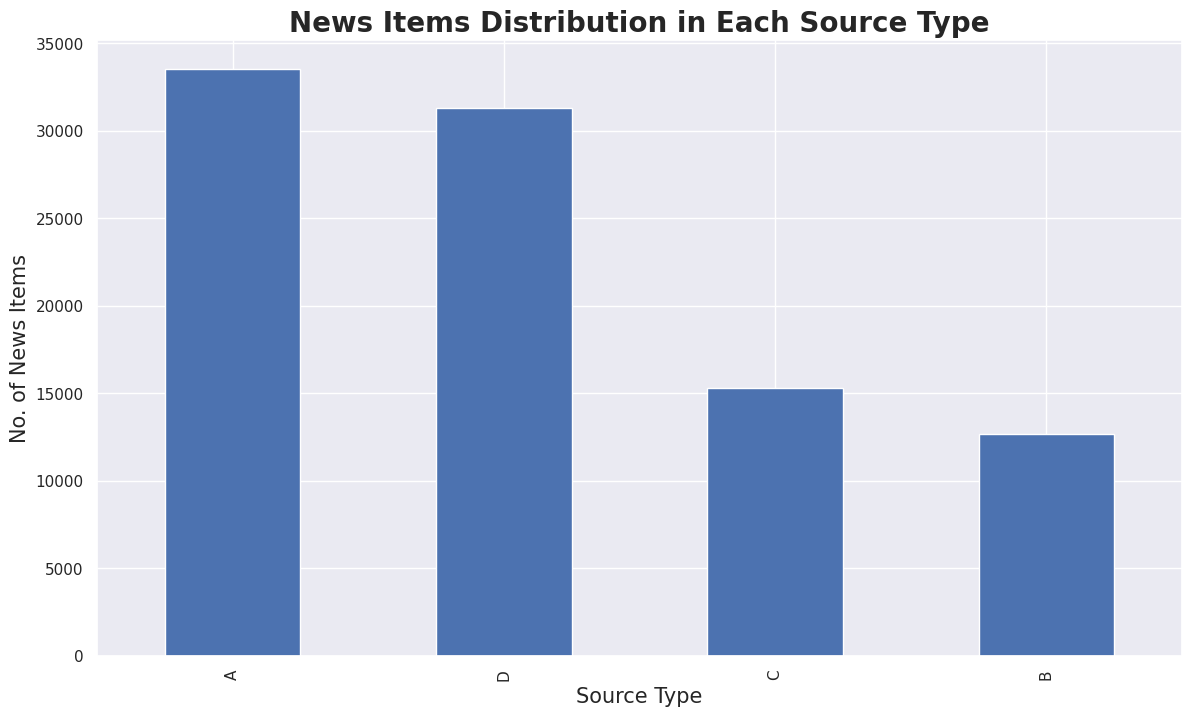

In [153]:
def show_news_distribution_in_sources(df):
    print('******** No. of News items in Sources ********')
    print(df.Source_type.value_counts(),'\n')

    plt.figure(figsize=(14,8))
    df.Source_type.value_counts().plot(kind='bar')
    plt.title('News Items Distribution in Each Source Type', fontdict={'size':20,'fontweight' : 'bold'})
    plt.xlabel('Source Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})

show_news_distribution_in_sources(master_df)

## **Popularity Comparison for Social Media Platforms**
---
- The plot below represents the popularity level of a particular news topic on different social media platform.

In [154]:
topics= ['Economy', 'Obama', 'Microsoft', 'Palestine']

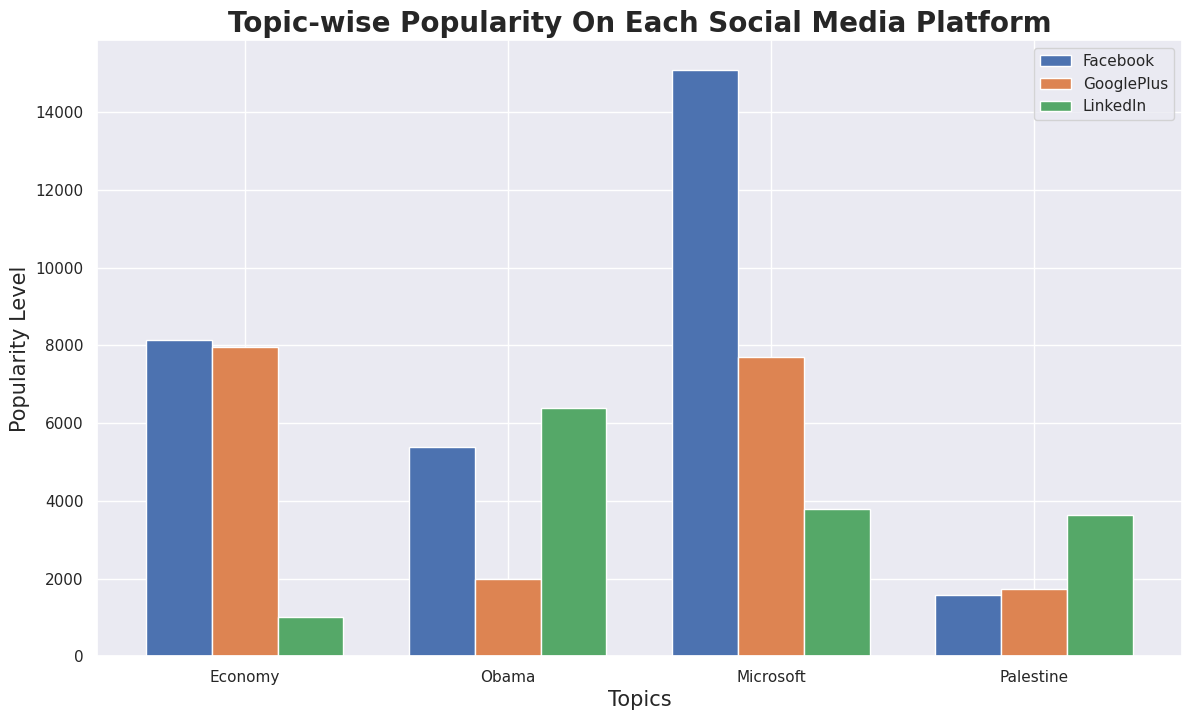

In [155]:
def show_popularities(df):
    facebook = abs(df.groupby(['Topic'])['Facebook_scaled'].sum())
    googleplus = abs(df.groupby(['Topic'])['GooglePlus_scaled'].sum())
    linkedin = abs(df.groupby(['Topic'])['LinkedIn_scaled'].sum())

    ind = np.arange(len(topics))


    plt.figure(figsize=(14,8))
    plt.bar(ind-0.25,facebook,width=0.25,label='Facebook')
    plt.bar(ind,googleplus,width=0.25,label='GooglePlus')
    plt.bar(ind+0.25,linkedin,width=0.25,label='LinkedIn')

    plt.xticks(ind, topics)
    plt.legend()
    plt.title('Topic-wise Popularity On Each Social Media Platform', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Topics', fontdict={'size':15})
    plt.ylabel('Popularity Level', fontdict={'size':15})
    plt.show()

show_popularities(master_df)

From the above observations we can conclude on few points:
-   News item related to Obama are much more popular on Facebook as compared to other platforms.
-   Popularity level of Economy related news items and Obama related news items is approximately equal on GooglePlus.
-   Popularity level of Economy news is same on both Facebook and GooglePlus.
-   On LinkedIn, Microsoft related news gains higher popularity compared to others.
-  On LinkedIn, popularity of Economy news items is very less.



In [156]:
def mean_cal(data):
    count = len(data)
    if count==0:
        return 0
    avg = (sum(data))/count

    return avg

rows = df['Facebook_Economy'].loc[:,'TS1':].columns

def mean_news_popularity(df_dict, social_media, rows):
    mean_df = pd.DataFrame(index = rows, columns = ['Economy','Microsoft','Obama','Palestine'])
    mean_df['Economy'] = df_dict[f'{social_media}_Economy'].apply(lambda x: mean_cal(list(x)))
    mean_df['Microsoft'] = df_dict[f'{social_media}_Microsoft'].apply(lambda x: mean_cal(list(x)))
    mean_df['Obama'] = df_dict[f'{social_media}_Obama'].apply(lambda x: mean_cal(list(x)))
    mean_df['Palestine'] = df_dict[f'{social_media}_Palestine'].apply(lambda x: mean_cal(list(x)))

    return mean_df

def show_news_popularity_with_time(df, Platform, rows):
    sns.set(rc={'figure.figsize':(25,7)})
    sns.lineplot(data = mean_news_popularity(df, Platform, rows), dashes=False)
    plt.title(f'News Popularity With Time On {Platform}',fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Time',fontdict={'size':15})
    plt.ylabel('Popularity',fontdict={'size':15})

def compare_news_popularity(df, Platform, rows):
    sns.set(rc={'figure.figsize':(10,7)})
    sns.barplot(data = mean_news_popularity(df, Platform, rows))
    plt.title(f'Popularity Comparison On {Platform}',fontdict={'size':20,'fontweight' : 'bold'})
    plt.xlabel('Topics',fontdict={'size':15})
    plt.ylabel('Popularity',fontdict={'size':15})

In [157]:
def mean_suitable_platform(df_dict, topic, rows):
    mean_df = pd.DataFrame(index=rows, columns = ['LinkedIn','GooglePlus','Facebook'])
    mean_df['LinkedIn'] = df_dict[f'LinkedIn_{topic}'].apply(lambda x: mean_cal(list(x)))
    mean_df['GooglePlus'] = df_dict[f'GooglePlus_{topic}'].apply(lambda x: mean_cal(list(x)))
    mean_df['Facebook'] = df_dict[f'Facebook_{topic}'].apply(lambda x: mean_cal(list(x)))

    return mean_df

def show_best_platform_for_news(df_dict, topic, rows):
    sns.set(rc={'figure.figsize':(25,7)})
    sns.lineplot(data = mean_suitable_platform(df_dict, topic, rows), dashes=False)
    plt.title(f'Best Social Media for {topic}',fontdict={'size':20,'fontweight' : 'bold'})
    plt.xlabel('Time',fontdict={'size':15})
    plt.ylabel('Popularity',fontdict={'size':15})

def compare_platforms(df_dict, topic, rows):
    sns.set(rc={'figure.figsize':(10,7)})
    sns.barplot(data = mean_suitable_platform(df_dict, topic, rows))
    plt.title(f'Platform Comparison for {topic}',fontdict={'size':20,'fontweight' : 'bold'})
    plt.xlabel('Social Media',fontdict={'size':15})
    plt.ylabel('Popularity',fontdict={'size':15})


In [158]:
def mean_source_popularity(df, df_dict, platform, rows):
    source_a_df, source_b_df, source_c_df, source_d_df = df[df['Source_type'] == 'A'],df[df['Source_type'] == 'B'],df[df['Source_type'] == 'C'],df[df['Source_type'] == 'D']

    platform_df = df_dict[f'{platform}_Economy'].append(df_dict[f'{platform}_Microsoft'].append(df_dict[f'{platform}_Obama'].append(df_dict[f'{platform}_Palestine'])))

    pt_sa = source_a_df.join(platform_df, on = 'IDLink',how = 'inner',lsuffix='l',rsuffix='r')
    pt_sb = source_b_df.join(platform_df, on = 'IDLink',how = 'inner',lsuffix='l',rsuffix='r')
    pt_sc = source_c_df.join(platform_df, on = 'IDLink',how = 'inner',lsuffix='l',rsuffix='r')
    pt_sd = source_d_df.join(platform_df, on = 'IDLink',how = 'inner',lsuffix='l',rsuffix='r')

    pt_sa = pt_sa.loc[:,'TS1':]
    pt_sb = pt_sb.loc[:,'TS1':]
    pt_sc = pt_sc.loc[:,'TS1':]
    pt_sd = pt_sd.loc[:,'TS1':]


    mean_df = pd.DataFrame(index=rows, columns = ['Source_A','Source_B','Source_C', 'Source_D'])
    mean_df.Source_A = pt_sa.apply(lambda x: mean_cal(list(x)))
    mean_df.Source_B = pt_sb.apply(lambda x: mean_cal(list(x)))
    mean_df.Source_C = pt_sc.apply(lambda x: mean_cal(list(x)))
    mean_df.Source_D = pt_sd.apply(lambda x: mean_cal(list(x)))

    return mean_df

def show_source_popularity_with_time(df, df_dict, platform, rows):
    sns.set(rc={'figure.figsize':(25,7)})
    sns.lineplot(data = mean_source_popularity(df, df_dict, platform, rows), dashes=False)
    plt.title(f'Source-wise Popularity on {platform}',fontdict={'size':20,'fontweight' : 'bold'})
    plt.xlabel('Time',fontdict={'size':15})
    plt.ylabel('Popularity',fontdict={'size':15})

def show_source_popularity_comparison(df, df_dict, platform, rows):

    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
    df1 = mean_source_popularity(df, df_dict, platform, rows)
    plt.suptitle(f'Source-wise Popularity Comparison on {platform}',fontsize = 20,fontweight = 'bold')
    sns.barplot(ax = axes[0],data = df1)
    sns.boxenplot(ax = axes[1],data = df1)
    axes[0].set_ylabel('Popularity', fontsize = 15)
    axes[0].set_xlabel('Sources', fontsize = 15)
    axes[1].set_ylabel('Popularity', fontsize = 15)
    axes[1].set_xlabel('Sources', fontsize = 15)


In [159]:
def plot_topic_date_vs_news_count(df):
    group_news_count = df.groupby('PublishDate').count()
    ax = plt.figure(figsize=(18,7))
    plt.plot(group_news_count.index, group_news_count['SentimentHeadline'], label='All News')
    ax.legend(ncol=2, loc="upper right", frameon=True)
    plt.title('No. of News Items Published Per Day',fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Published Date',fontdict={'size':15})
    plt.ylabel('Number of News Published',fontdict={'size':15})

In [160]:
def plot_topic_date_vs_news_items_published():

    group_obama = obama_news.groupby('PublishDate').count()
    group_microsoft = microsoft_news.groupby('PublishDate').count()
    group_economy = economy_news.groupby('PublishDate').count()
    group_palestine = palestine_news.groupby('PublishDate').count()

    ax = plt.figure(figsize=(18,7))
    plt.plot(group_obama.index, group_obama['SentimentHeadline'], label='Obama')
    plt.plot(group_microsoft.index, group_microsoft['SentimentHeadline'], label='Microsoft')
    plt.plot(group_economy.index, group_economy['SentimentHeadline'] , label='Economy')
    plt.plot(group_palestine.index, group_palestine['SentimentHeadline'], label='Palestine')
    plt.title('No. of News Items Published Per Day on Various Topics',fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Published Date',fontdict={'size':15})
    plt.ylabel('Number of News Published',fontdict={'size':15})
    plt.legend(loc=2)

In [161]:
def plot_news_vs_publish_date_month_wise(News_Final, sd, ed):
    startdate = pd.to_datetime(sd).date()
    enddate = pd.to_datetime(ed).date()
    news_final_new1 = News_Final[(News_Final['PublishDate']>=startdate) & (News_Final['PublishDate']<=enddate)]
    group_news1 = news_final_new1.groupby('PublishDate' ).count()
    # mean_group_news1  = news_final_new1.groupby('PublishDate').mean()

    ax = plt.figure(figsize=(18,7))
    plt.plot(group_news1.index, group_news1['SentimentHeadline'])
    plt.title('No. of News Items Publish Per Month',fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Published Date',fontdict={'size':15})
    plt.ylabel('Number of News',fontdict={'size':15})


In [162]:
def plot_hour_vs_popularity(df, social_media):
    df['Hour'] = df['PublishTime'].apply(lambda x: str(x)[0:2])
    df=df.sort_values(by='Hour')
    ax = plt.figure(figsize=(18,7))
    sns.lineplot(data=df, y = social_media, x= 'Hour')
    plt.title(f'Popularity On {social_media} At Each Hour', fontdict={'fontsize': 22, 'fontweight' : 'bold'})
    plt.xlabel('Hour',fontsize = 15)
    plt.ylabel(f'{social_media}',fontsize = 15)

In [163]:
def show_relation_between_sentiment_and_dependent_features(df, sentimentType, feature):
    df1 = df[['Facebook', 'GooglePlus','LinkedIn','Topic', 'SentimentTitle','SentimentHeadline']]
    # df1['Facebook'] = np.log10(df['Facebook'][df['Facebook']>0])
    # df1['GooglePlus'] = np.log10(df['GooglePlus'][df['GooglePlus']>0])
    # df1['LinkedIn'] = np.log10(df['LinkedIn'][df['LinkedIn']>0])

    fig = px.scatter(df1, x=sentimentType, y=feature, color="Topic", symbol="Topic", title=f'Popularity Based on {Sentiment_Type}')
    fig.show()

def show_sentiment_correlation(df):
    fig = px.scatter(df, x="SentimentTitle", y="SentimentHeadline", facet_col="Topic", title='Correlation Between Title Sentiment and Headline Sentiment',facet_row="Source_type", trendline="ols",trendline_color_override="red")
    fig.show()

def show_sentiment_heatmap(df):
    sns.heatmap(master_df[['SentimentHeadline','SentimentTitle','Facebook','GooglePlus','LinkedIn']].corr(),annot=True)
    plt.title('Sentiment HeatMap', fontdict={'size':20, 'fontweight' : 'bold'})

In [164]:
def senti_mean(df, df_dict, platform, rows):
    senti_p_df, senti_neu_df, senti_n_df = df[df['SentimentTitle_Category'] == 'positive'],df[df['SentimentTitle_Category'] == 'neutral'],df[df['SentimentTitle_Category'] == 'negative']
    platform_df = df_dict[f'{platform}_Economy'].append(df_dict[f'{platform}_Microsoft'].append(df_dict[f'{platform}_Obama'].append(df_dict[f'{platform}_Palestine'])))

    spos = senti_p_df.join(platform_df, on = 'IDLink',how = 'inner',lsuffix='l',rsuffix='r')
    sneu = senti_neu_df.join(platform_df, on = 'IDLink',how = 'inner',lsuffix='l',rsuffix='r')
    sneg = senti_n_df.join(platform_df, on = 'IDLink',how = 'inner',lsuffix='l',rsuffix='r')

    spos = spos.loc[:,'TS1':]
    sneu = sneu.loc[:,'TS1':]
    sneg = sneg.loc[:,'TS1':]


    senti_mean_df = pd.DataFrame(index=rows, columns = ['Positive','Neutral','Negative'])
    senti_mean_df.Positive = spos.apply(lambda x: mean_cal(list(x)))
    senti_mean_df.Neutral = sneu.apply(lambda x: mean_cal(list(x)))
    senti_mean_df.Negative = sneg.apply(lambda x: mean_cal(list(x)))

    return senti_mean_df

def show_sentiment_popularity_trend(df, df_dict, platform, rows):
    sns.set(rc={'figure.figsize':(25,7)})
    sns.lineplot(data = senti_mean(df, df_dict, platform, rows), dashes=False)
    plt.title(f'Sentiment-wise Popularity on {platform}',fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Time',fontdict={'size':15})
    plt.ylabel('Popularity',fontdict={'size':15})

def show_sentiment_popularity_comparison(df, df_dict, platform, rows):

    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
    df1 = senti_mean(df, df_dict, platform, rows)
    plt.suptitle(f'Popularity Comparison on {platform}',fontsize = 22, fontweight = 'bold')
    sns.barplot(ax = axes[0],data = df1)
    sns.boxenplot(ax = axes[1],data = df1)
    axes[0].set_ylabel('Popularity', fontsize = 15)
    axes[0].set_xlabel('Sentiment', fontsize = 15)
    axes[1].set_ylabel('Popularity', fontsize = 15)
    axes[1].set_xlabel('Sentiment', fontsize = 15)


In [165]:
def weekday_distribution(df):
    df1 = df[['Facebook','LinkedIn','GooglePlus','Weekday']]
    temp_df = pd.DataFrame([df1.groupby(['Weekday'])['Facebook'].mean(),df1.groupby(['Weekday'])['LinkedIn'].mean(),df1.groupby(['Weekday'])['GooglePlus'].mean()])

    fig, axes = plt.subplots(1, 3, sharex=True, figsize=(25,7))
    fig.suptitle('Weekdays Mean News Popularity Distribution', fontsize=22,fontweight='bold')
    temp_df.T['Facebook'].plot(ax = axes[0],kind='bar', color= 'grey', title='Facebook', ylabel='Popularity')
    temp_df.T['GooglePlus'].plot(ax = axes[1],kind='bar', color= 'lightgreen',title='GooglePlus',ylabel='Popularity')
    temp_df.T['LinkedIn'].plot(ax = axes[2],kind='bar', color= 'red', title='LinkedIn',ylabel='Popularity')
    axes[0].set_xlabel('Weekday', fontsize = 15)
    axes[0].set_ylabel('Popularity', fontsize = 15)
    axes[1].set_xlabel('Weekday', fontsize = 15)
    axes[1].set_ylabel('Popularity', fontsize = 15)
    axes[2].set_xlabel('Weekday', fontsize = 15)
    axes[2].set_ylabel('Popularity', fontsize = 15)

## **News Popularity Over The Time Period**
---
Here, we can see the trend of rise in popularity of different Topics on a particular social media platform.

### **Select a Social Media Platform**


In [166]:
Platform = "Facebook" #@param ["Facebook", "GooglePlus", "LinkedIn"]

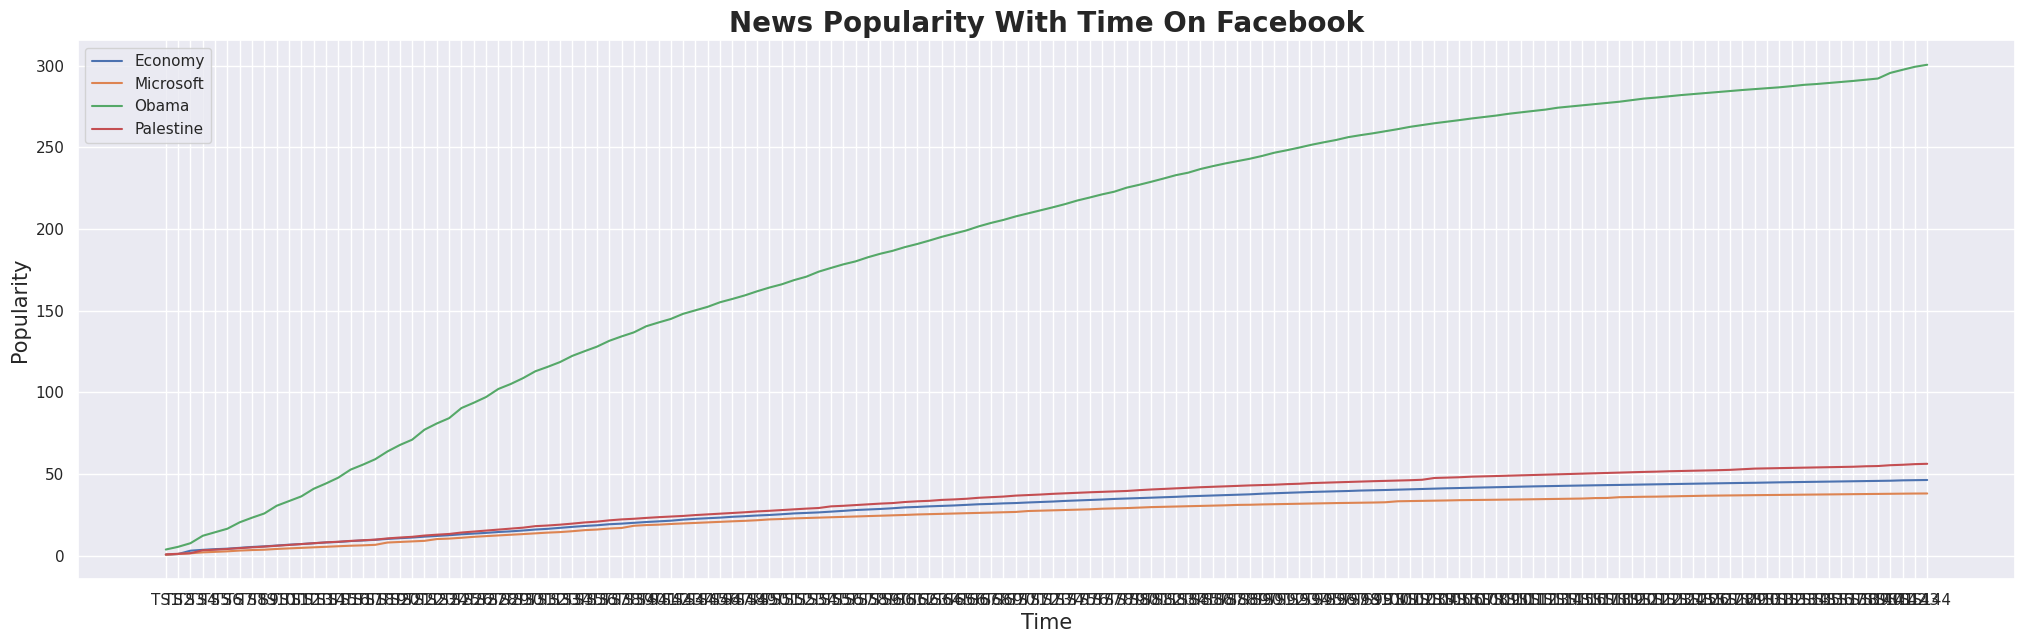

In [167]:
show_news_popularity_with_time(df, Platform, rows)

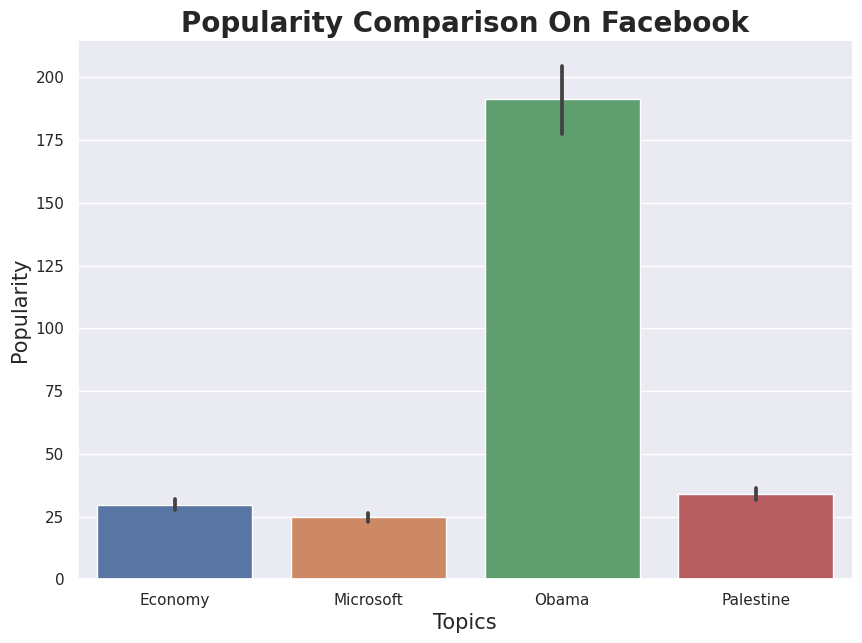

In [168]:
compare_news_popularity(df, Platform, rows)

1. Supposedly the platform is GooglePlus, then we can say that the popularity trend of Economy is always below the popularity level of other topics over the time period.
2. Similarly, popularity of Obama news increases substantially over the period of time.

## **Best Social Media for Topics**
---
By looking into the below graph you can potentially identify the platform that will provide the higher popularity for a news item of a particular topic.

### **Select the Topic**

In [169]:
Topic = "Economy" #@param ["Economy", "Microsoft", "Obama","Palestine"]

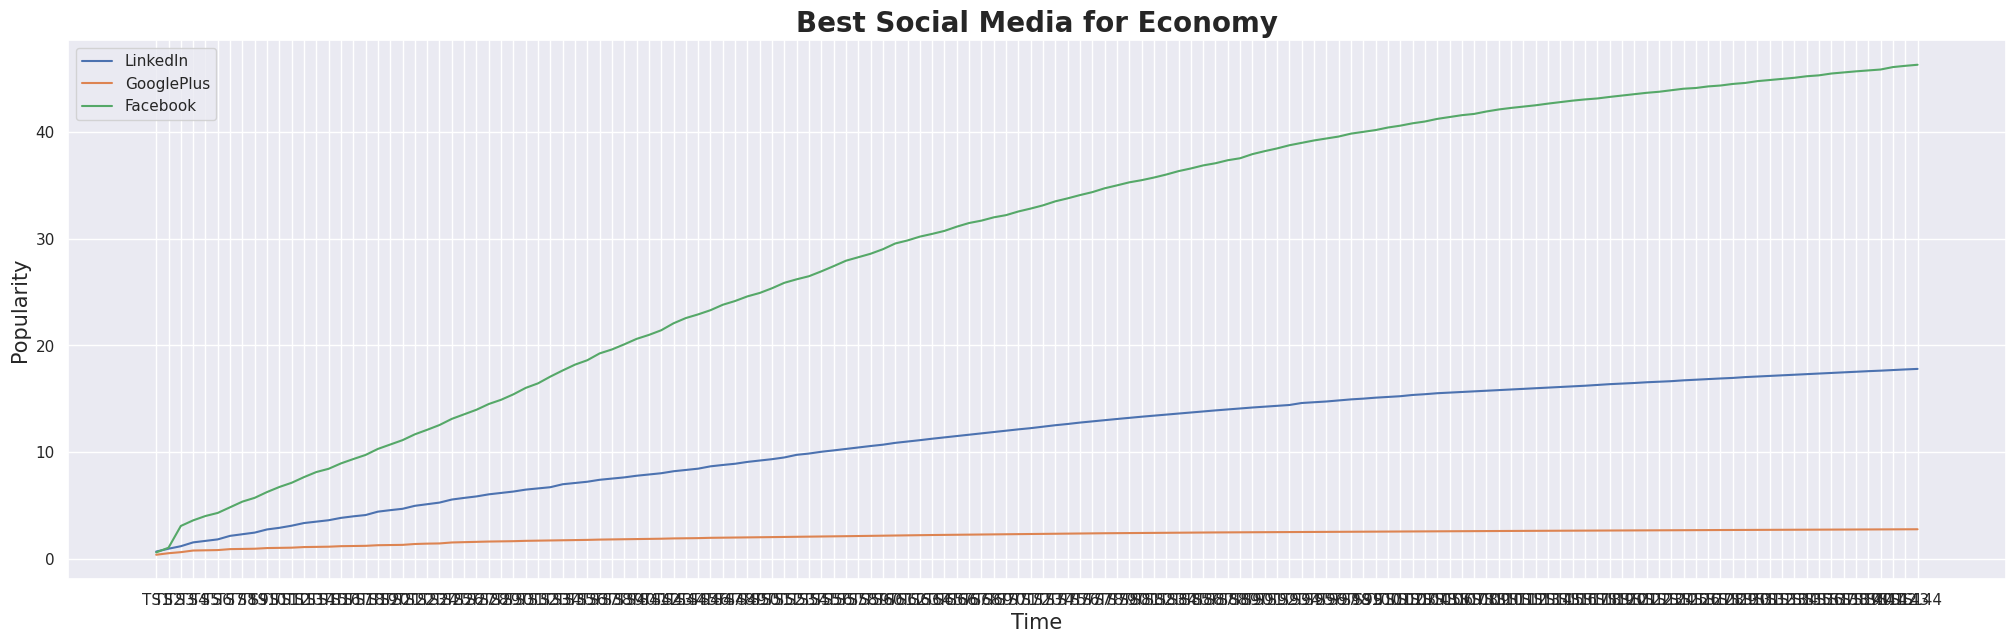

In [170]:
show_best_platform_for_news(df, Topic, rows)

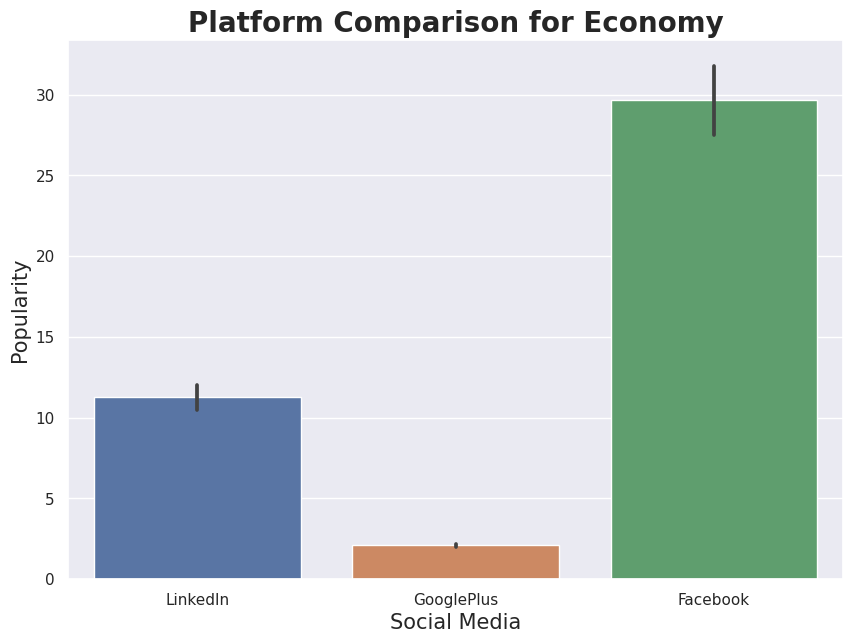

In [171]:
compare_platforms(df, Topic, rows)

As we can see, the Facebook is the better platform for gaining higher popularity for news items related to Economy.

## **Source-wise Popularity On Social Media**
---
Here, we can see the most favourable social media platform for sources of a particular category.

### **Select a Platform**

In [172]:
Platform = "Facebook" #@param ["Facebook", "GooglePlus", "LinkedIn"]

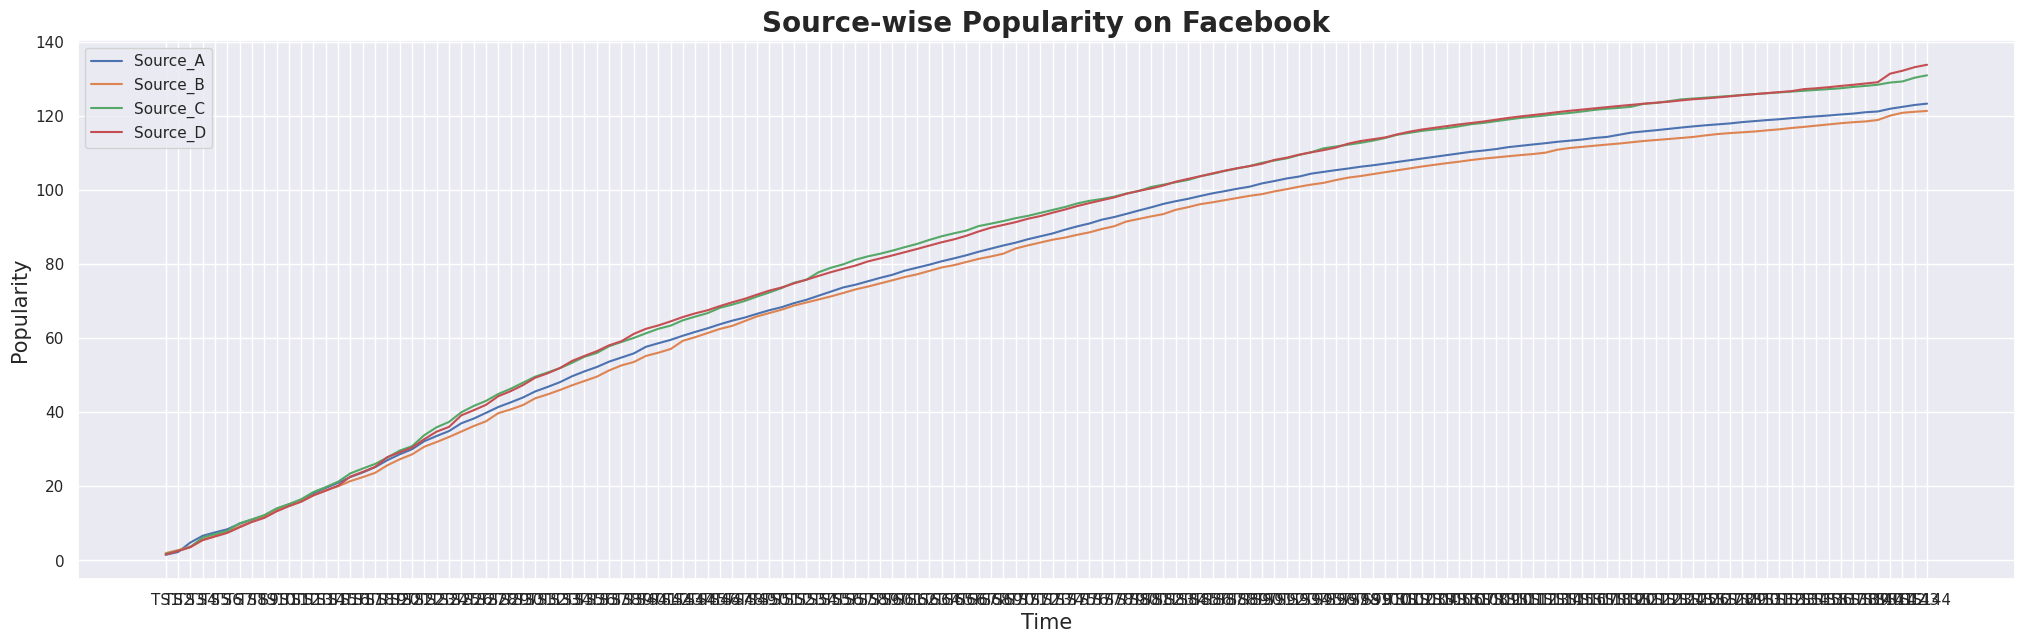

In [173]:
show_source_popularity_with_time(master_df, df, Platform, rows)

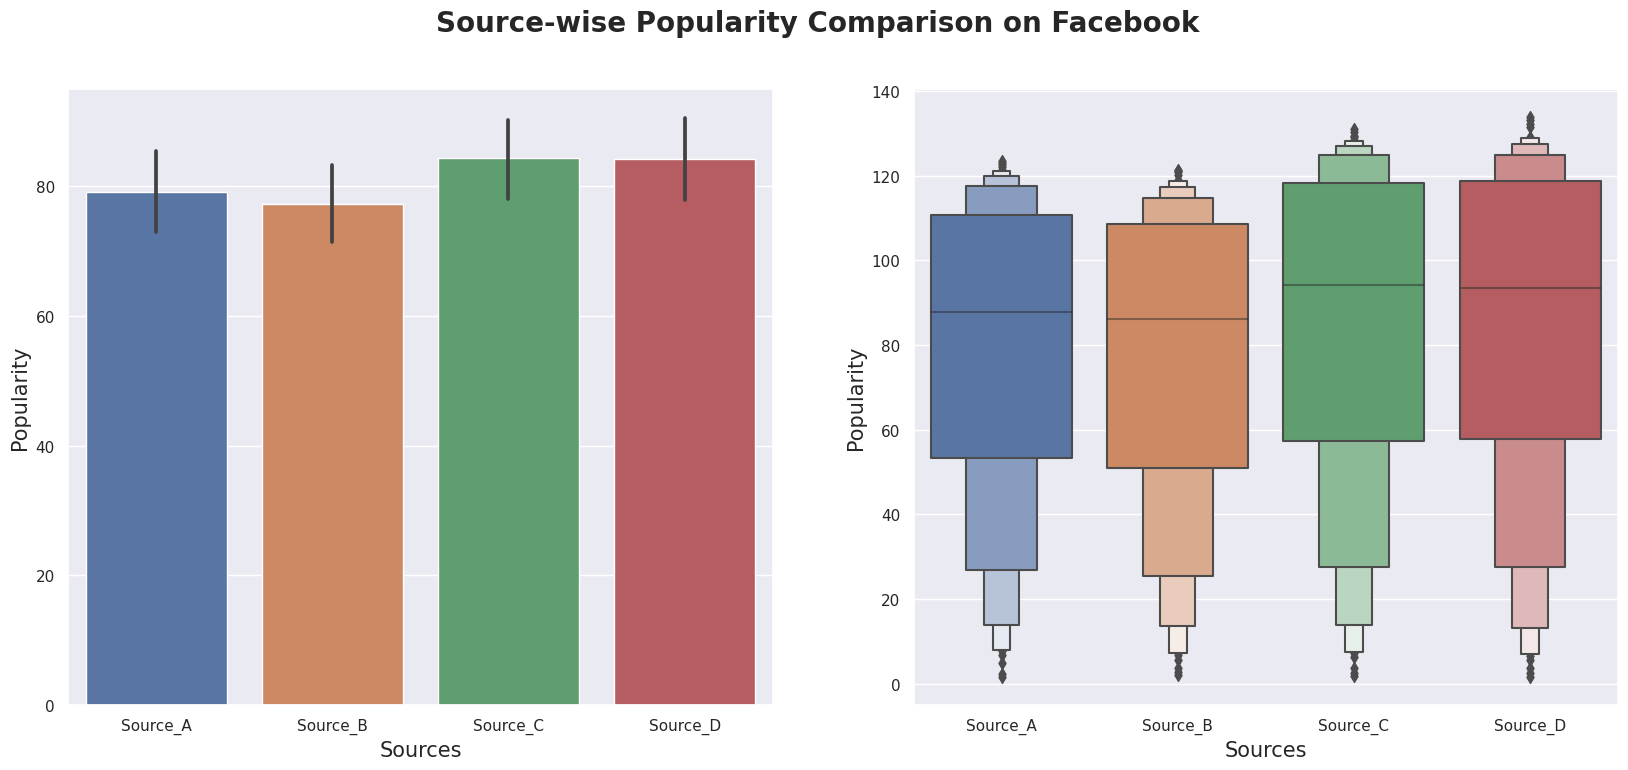

In [174]:
show_source_popularity_comparison(master_df, df, Platform, rows)

> - We can see the different popularity trend line of sources on a selected platform.
> - From Boxen Plots, we can see the range in which popularity lies for news items on a particular platform and their outliers.
> - Bar graph compares the popularity of different sources on a selected platform.

## **News Published Per Day On Various Topics**
---
Below graph shows the number of news items published on various topics of a period of 8 months.

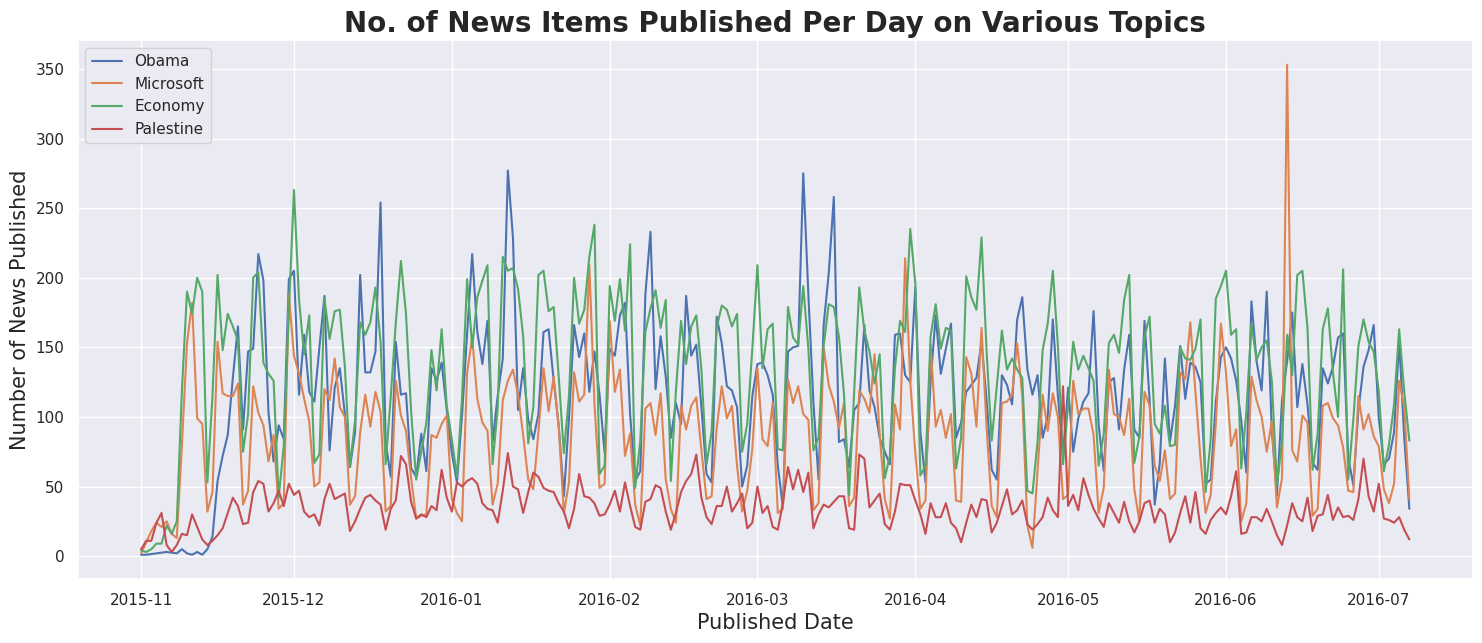

In [175]:
plot_topic_date_vs_news_items_published()

> From the above graph, we can conclude that number of news items published of Palestine is less as compared to other news items belonging to other topics.

## **News Items Published in a Month**
---
Here, you just need to select the date range, and it will show you the news items published in month.

### **Select Start and End Date**

In [176]:
Start_Date = '2015-12-12' #@param {type:"date"}
End_Date = '2016-02-12' #@param {type:"date"}

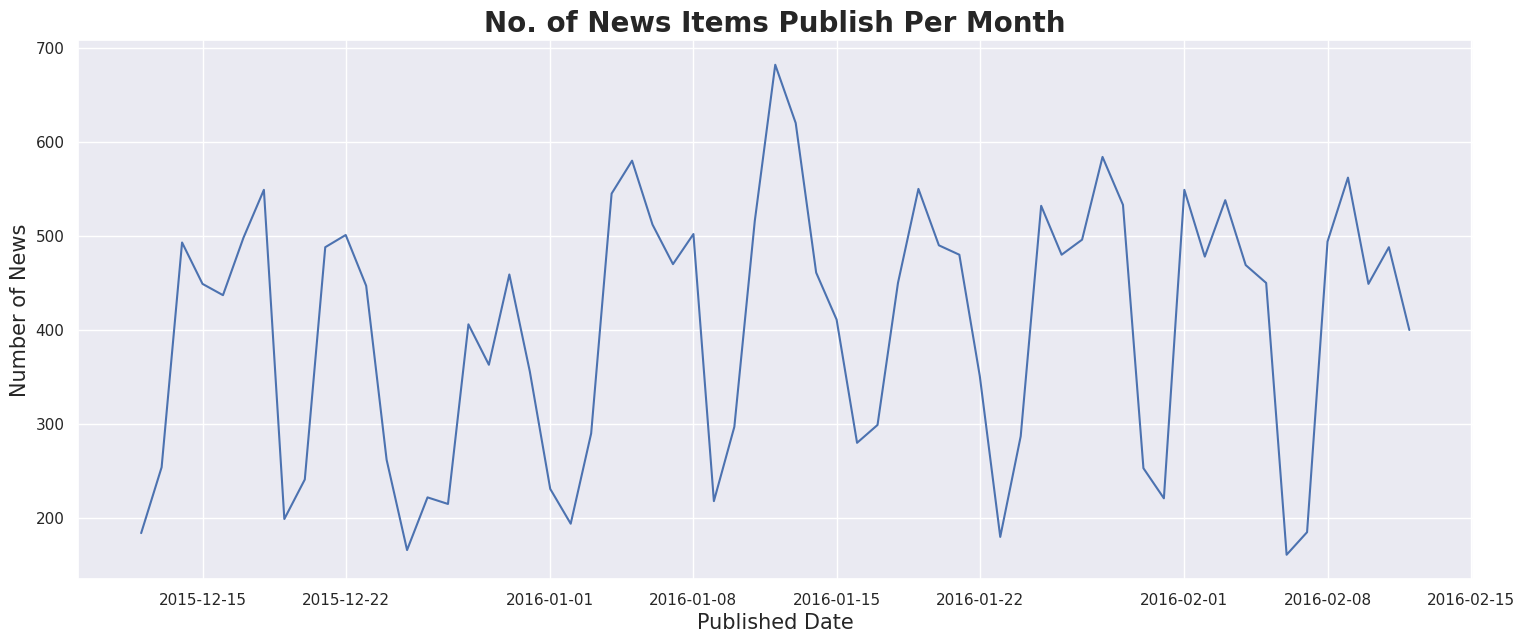

In [177]:
plot_news_vs_publish_date_month_wise(master_df, str(Start_Date),str(End_Date))

> From the above plot we can depict that the number of news items published expriences a drastic fall on every week-end.

## **Popularity Trend On Social Media At Every Hour**
---
From the below graph, you can see the popularity trend at every hour on a particular platform.

### **Select Platform:**

In [178]:
Platform = "Facebook" #@param ["Facebook", "GooglePlus", "LinkedIn"]

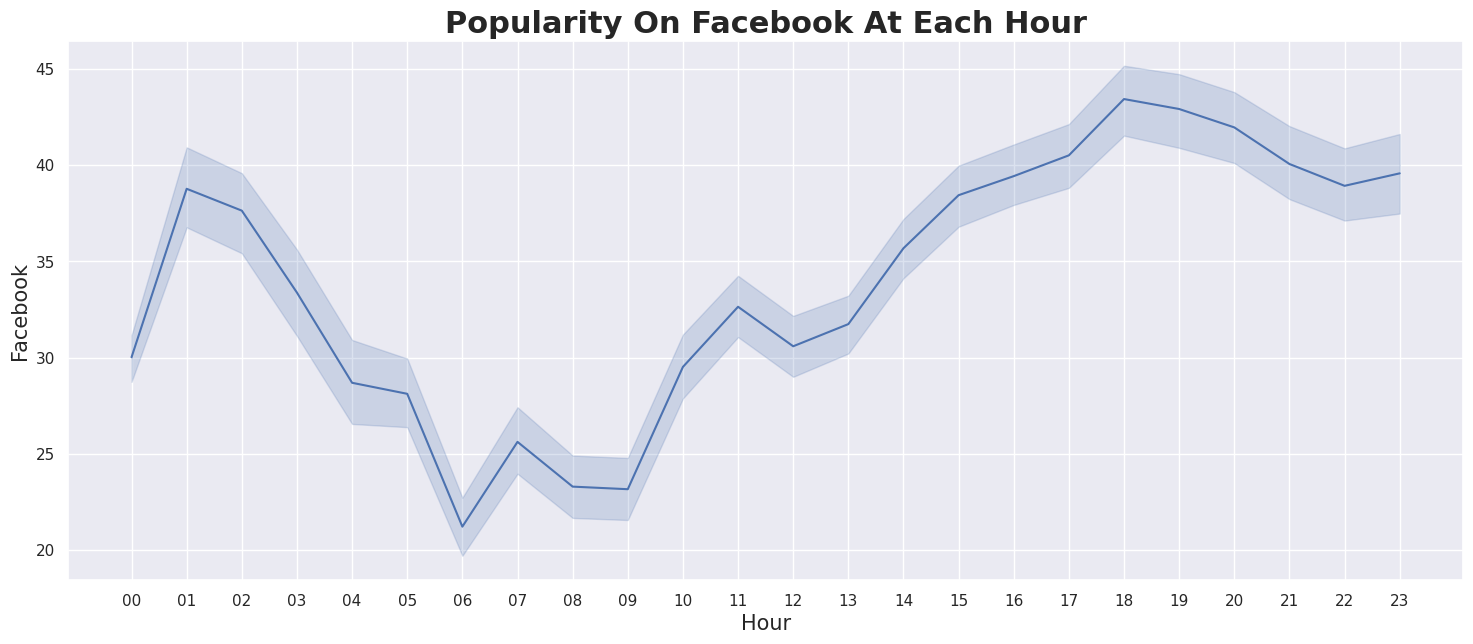

In [179]:
plot_hour_vs_popularity(master_df,Platform)

> - We can conclude that the popularity of almost every news item rises from 14:00 till mid-night.
> - And drastically decreases thereafter.

## **Correlation Heatmap**
---

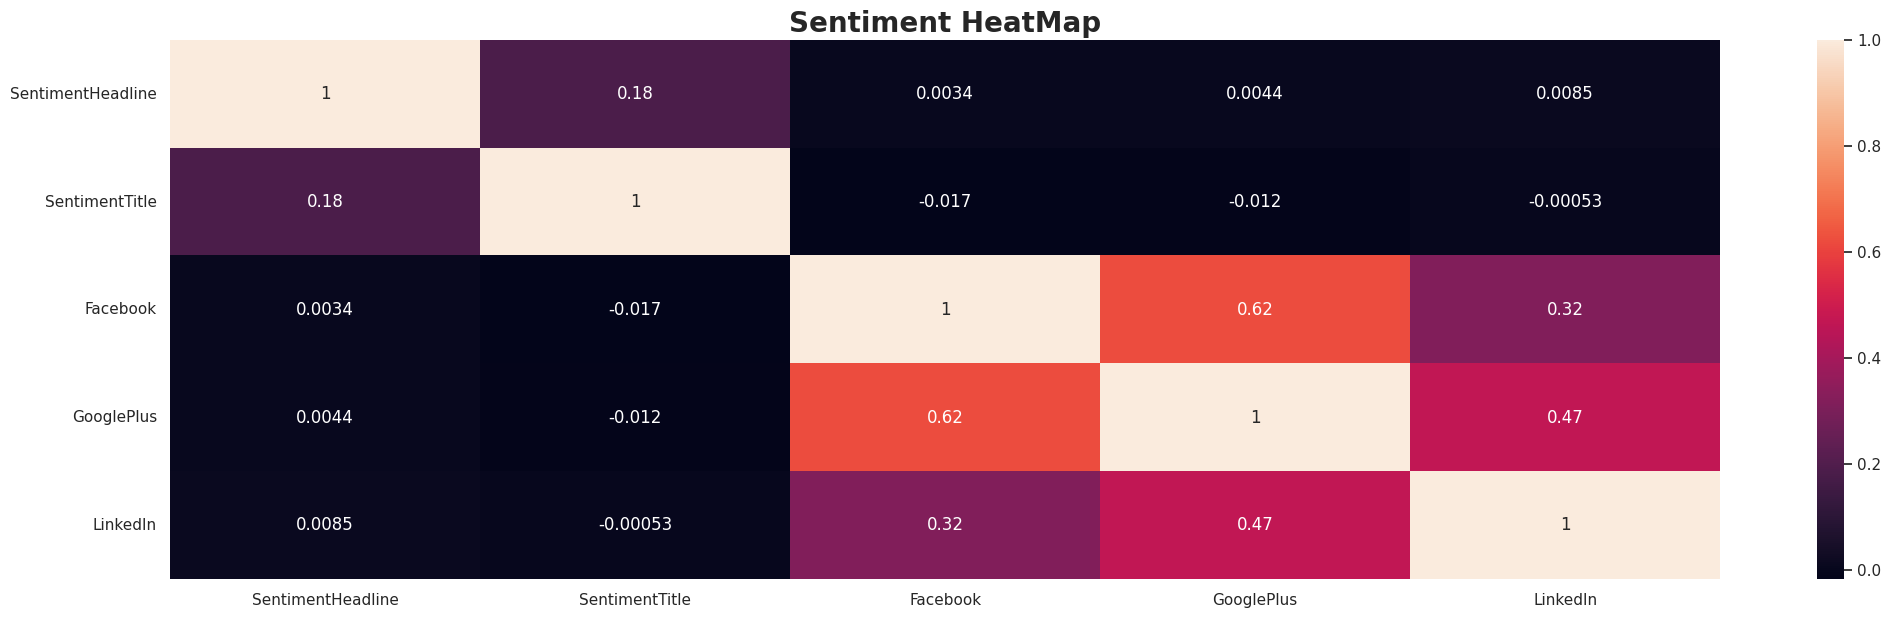

In [180]:
show_sentiment_heatmap(master_df)

> - We can see that the correlation between dependent features is very near about 0.4-0.6, which shows that there is no evident collinearity between dependent features.
> - Facebook and GooglePlus seem to have a little collinearity.

## **Sentiment-wise Popularity On a Platform**
---
This graph depicts the change in popularity with time based on sentiment type.

### **Select Platform:**

In [181]:
Platform = "Facebook" #@param ["Facebook", "GooglePlus", "LinkedIn"]

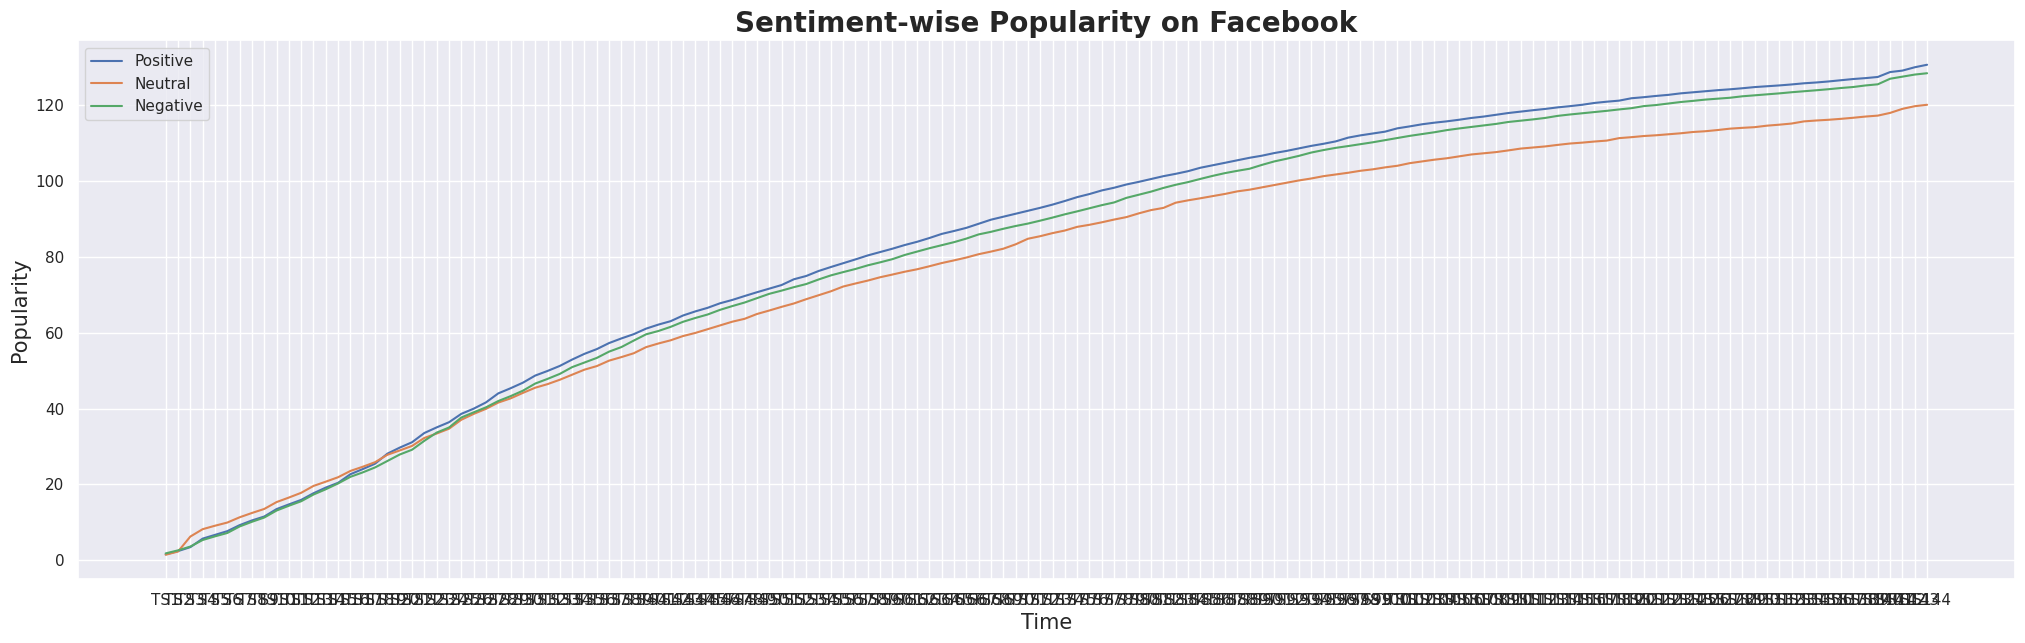

In [182]:
show_sentiment_popularity_trend(master_df, df, Platform, rows )

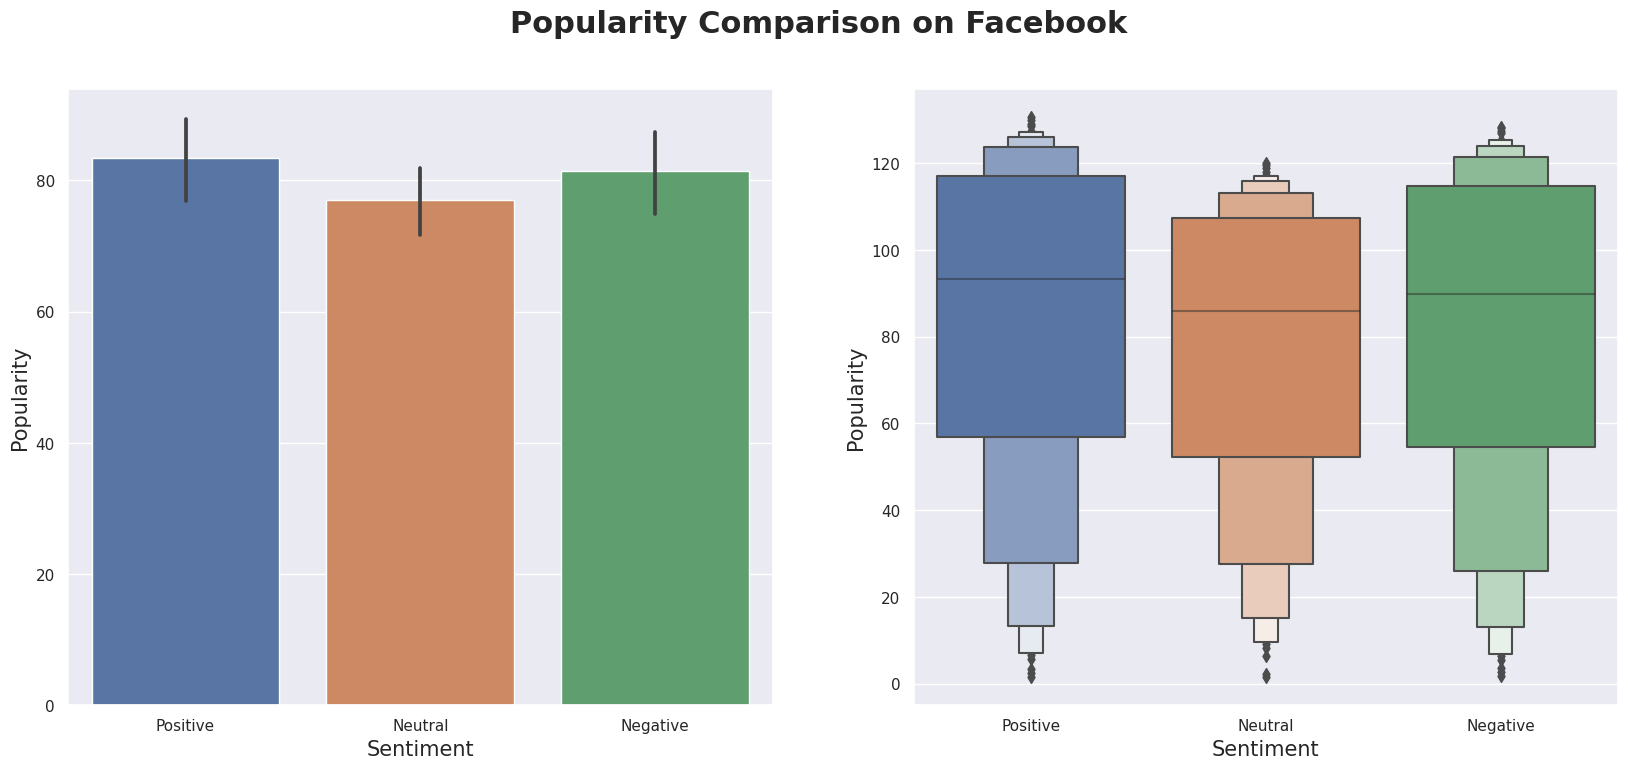

In [183]:
show_sentiment_popularity_comparison(master_df, df, Platform, rows)

> - From the above graphs we can conclude that the popularity of neutral sentiment items always remains below the popularity of positive and negative sentiment items.
> - Boxen plot shows the popularity outliers based on their sentiment.

## **Popularity Based on Published Weekday**
---
These plots depicts the popularity distribution on day to day basis.

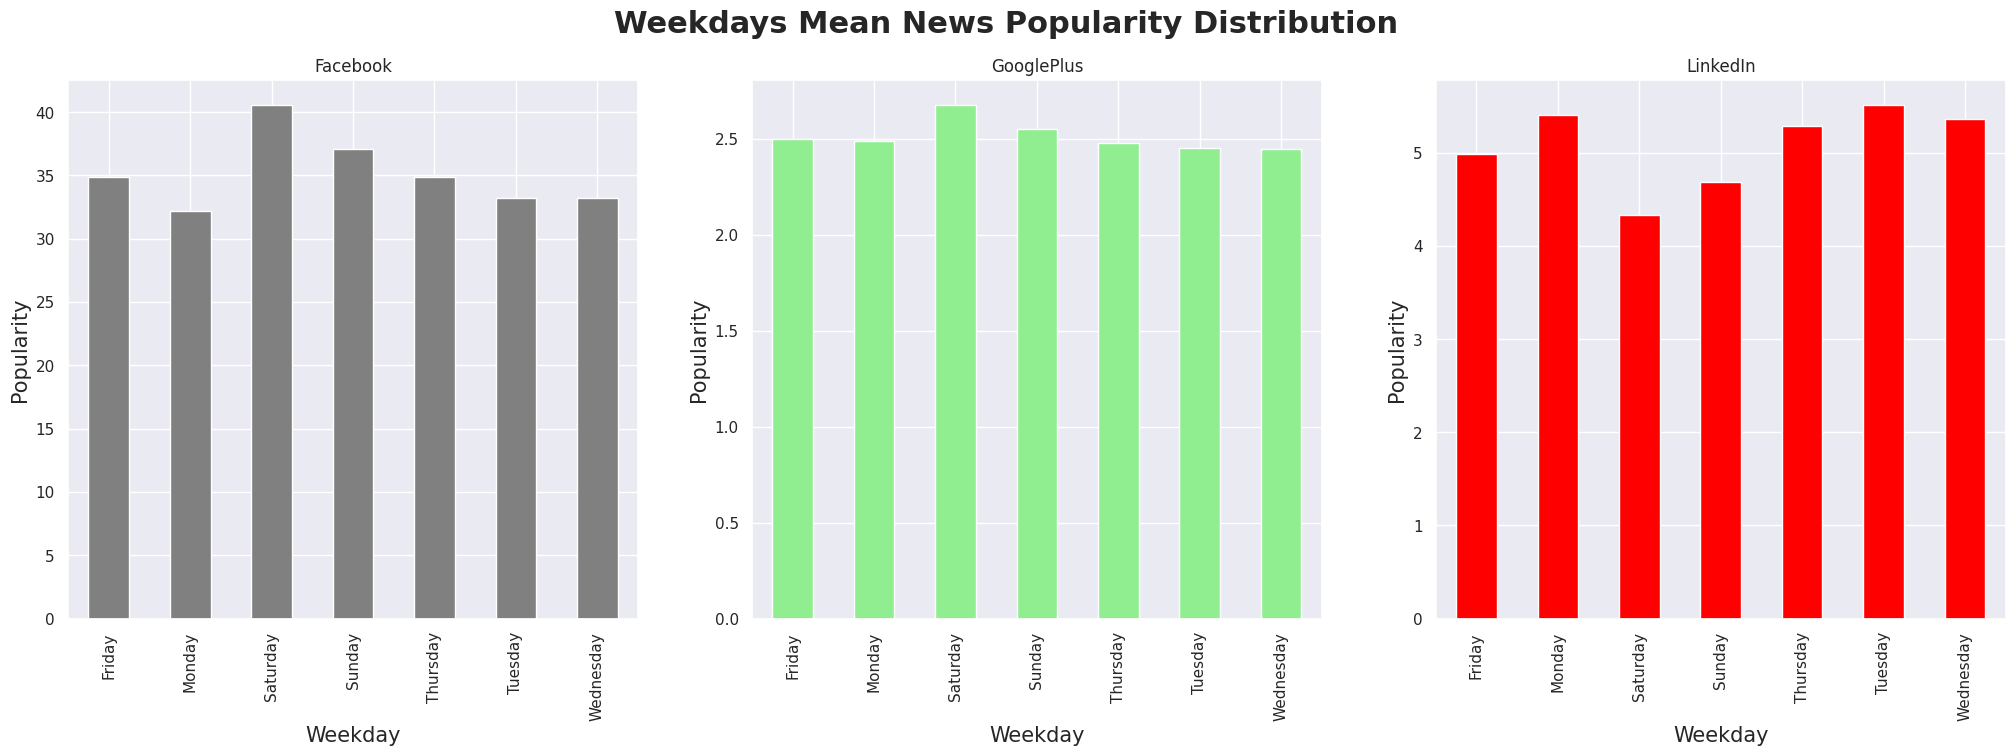

In [184]:
weekday_distribution(master_df)

> - Saturdays are good for Facebook and GooglePlus but bad for LinkedIn in terms of popularity.
> - Mondays are good for LinkedIn but bad for Facebook.

#**EDA Conclusions:**

-	Neutral news is published the least. popularity of neutral sentiment items always remains below the popularity of positive and negative sentiment items.
Topic:
-	The most popular topic across all platforms is news about Obama.
Platform:
-	On LinkedIn Microsoft news gains the highest popularity.
-	Facebook performs better compared to other platforms.
-	Popularity of Obama news has been found to be exponentially increasing across all social media platforms.
-	Number of news items published of Palestine is less as compared to other news items belonging to other topics.
Time:
-	number of news items published experiences a drastic fall on every week-end.
-	Popularity of news item rises from 14:00 till mid-night.
-	Saturdays are good for Facebook and GooglePlus but bad for LinkedIn in terms of popularity.
-	Mondays are good for LinkedIn but bad for Facebook.


#**Business Problem Solutions:**

> Based on inferences from EDA, it is recommended to post:
- News on Facebook on the topic Obama between 14:00 till mid-night, on a Saturday, to improve the chances of it being popular.
- News on LinkedIn on the topic Microsoft, on a Monday, to improve the chances of it being popular.



In [185]:
master_df.to_csv('/content/drive/My Drive/AI_Desicion_Scineces2_endterm/final_data.csv', index=False)

#**Preprocess Text data**
---

#### **Cleaning the text column ('reviewText') by:**
- Removing stop words
- Convert text to lowercase
- Removing punctuations and numbers
- Tokenizing
- Stemming and
- Lemmatization

In [186]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [187]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string


# Combine Title and Headline into a single text column
master_df['Text'] = master_df['Title'] + ' ' + master_df['Headline']

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text (split into words)
    words = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into text
    text = ' '.join(words)

    return text

# Apply preprocessing to the 'Text' column
master_df['Processed_Text'] = master_df['Text'].apply(preprocess_text)

## **Tfidf vector**
---
- Applying **TF-IDF Vectorization** method for text preprocessing.

- Parameters of TF-IDF Vecotrizer:
    > **Analyzer:** word
    
    > **Stop_words:** english
    
    > **Max_df:** 0.7
    
    > **Min_df:** 150

    > **Max_features:** 1000

In [188]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    max_df=0.7,
    min_df=150,
    max_features=1000
)
tfidf_matrix = tfidf_vectorizer.fit_transform(master_df['Processed_Text'])

In [189]:
# Convert TF-IDF matrix to a DataFrame
tfidfvect_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [190]:
# Reset the index of both DataFrames
master_df.reset_index(drop=True, inplace=True)
tfidfvect_df.reset_index(drop=True, inplace=True)

# Merge the non-text columns with the TF-IDF vectors
result_df = pd.concat([master_df, tfidfvect_df], axis=1)

# You now have a DataFrame 'result_df' that combines non-text columns with TF-IDF vectors.
print(result_df)


         IDLink                                              Title  \
0       80690.0                                Monday, 29 Feb 2016   
1       28854.0       Buffett: Politicians 'Dead Wrong' on Economy   
2       81052.0                                Monday, 29 Feb 2016   
3       80994.0                                Tuesday, 1 Mar 2016   
4         946.0   Microsoft Takes Six Billion Dollars From Android   
...         ...                                                ...   
92803   61851.0  Stocks rise as investors key in on US economy ...   
92804   61865.0  Russian PM proposes to use conservative and to...   
92805  104793.0  Palestinian Government Uses Foreign Aid To Pay...   
92806  104794.0  Palestine Youth Orchestra prepares for first U...   
92807   61870.0  Sausalito businesswoman wins $10000 in Microso...   

                                                Headline      Topic  \
0      RAMALLAH, February 25, 2016 (WAFA) - Palestine...  palestine   
1      Warren Buf

In [191]:
result_df.head(2)

IDLink                                         Title  \
0  80690.0                           Monday, 29 Feb 2016   
1  28854.0  Buffett: Politicians 'Dead Wrong' on Economy   

                                            Headline      Topic PublishDate  \
0  RAMALLAH, February 25, 2016 (WAFA) - Palestine...  palestine  2016-02-28   
1  Warren Buffett has a message for presidential ...    economy  2016-02-28   

   SentimentTitle  SentimentHeadline  Facebook  GooglePlus  LinkedIn  ...  \
0        0.000000          -0.005906       1.0         1.0       1.0  ...   
1        0.051031          -0.037921       0.0         0.0       0.0  ...   

  worri worst  write  xbox  year yellen yesterday york young zika  
0   0.0   0.0    0.0   0.0   0.0    0.0       0.0  0.0   0.0  0.0  
1   0.0   0.0    0.0   0.0   0.0    0.0       0.0  0.0   0.0  0.0  

[2 rows x 1021 columns]

In [192]:
# Dropping irrelevant columns, i.e. other than
irrelevant_columns = ['IDLink', 'Title', 'Headline', 'PublishDate', 'Facebook',
                      'SentimentTitle','SentimentHeadline', 'GooglePlus',
                      'LinkedIn']
result_df.drop(columns = irrelevant_columns, inplace = True)

###**One-hot encoding the categorical columns**

In [193]:
result_df = pd.get_dummies(result_df, columns=['Topic','SentimentTitle_Category','SentimentHeadline_Category','Source_type','Weekday'])

print(result_df.shape)
result_df.head()

(92808, 1028)


PublishTime  Facebook_scaled  GooglePlus_scaled  LinkedIn_scaled Hour  \
0    14:03:00         -0.64969          -0.617774        -0.563154   14   
1    19:17:00          0.00000           0.000000         0.000000   19   
2    09:29:00         -0.64969          -0.617774        -0.563154   09   
3    00:15:00         -0.64969          -0.617774        -0.563154   00   
4    00:00:00          0.00000           0.000000         0.000000   00   

                                                Text  \
0  Monday, 29 Feb 2016 RAMALLAH, February 25, 201...   
1  Buffett: Politicians 'Dead Wrong' on Economy W...   
2  Monday, 29 Feb 2016 RAMALLAH, February 29, 201...   
3  Tuesday, 1 Mar 2016 RAMALLAH, February 29, 201...   
4  Microsoft Takes Six Billion Dollars From Andro...   

                                      Processed_Text   10   11   12  ...  \
0  monday 29 feb 2016 ramallah februari 25 2016 w...  0.0  0.0  0.0  ...   
1  buffett politician dead wrong economi warren b...  0.0  0.0  0.0  ...   
2  monday 29 feb 2016 ramallah februari 29 2016 w...  0.0  0.0  0.0  ...   
3  tuesday 1 mar 2016 ramallah februari 29 2016 w...  0.0  0.0  0.0  ...   
4  microsoft take six billion dollar android long...  0.0  0.0  0.0  ...   

   Source_type_B  Source_type_C  Source_type_D  Weekday_Friday  \
0              0              0              1               0   
1              0              0              1               0   
2              0              0              1               0   
3              0              0              1               0   
4              0              0              1               0   

   Weekday_Monday  Weekday_Saturday  Weekday_Sunday  Weekday_Thursday  \
0               0                 0               1                 0   
1               0                 0               1                 0   
2               0                 0               0                 0   
3               0                 0               0                 0   
4               0                 0               1                 0   

   Weekday_Tuesday  Weekday_Wednesday  
0                0                  0  
1                0                  0  
2                1                  0  
3                1                  0  
4                0                  0  

[5 rows x 1028 columns]

#**Sampling**
---

In [194]:
# The percentage of data to sample
sample_percentage = 0.2

# Perform simple random sampling
sample_data = result_df.sample(frac=sample_percentage, random_state=42)

#**Modelling**
---

In [195]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

# Assuming you have a DataFrame df with multiple target columns: target1, target2, target3
X = sample_data.drop(['Facebook_scaled', 'LinkedIn_scaled', 'GooglePlus_scaled'], axis=1)  # Features
y = sample_data[['Facebook_scaled', 'LinkedIn_scaled', 'GooglePlus_scaled']]  # Multiple target columns

In [196]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
# Select columns with data type 'object' (strings)
object_columns = result_df.select_dtypes(include=['object'])

# List the object columns
print("Object Columns:")
print(object_columns)

Object Columns:
      PublishTime Hour                                               Text  \
0        14:03:00   14  Monday, 29 Feb 2016 RAMALLAH, February 25, 201...   
1        19:17:00   19  Buffett: Politicians 'Dead Wrong' on Economy W...   
2        09:29:00   09  Monday, 29 Feb 2016 RAMALLAH, February 29, 201...   
3        00:15:00   00  Tuesday, 1 Mar 2016 RAMALLAH, February 29, 201...   
4        00:00:00   00  Microsoft Takes Six Billion Dollars From Andro...   
...           ...  ...                                                ...   
92803    15:31:05   15  Stocks rise as investors key in on US economy ...   
92804    15:31:10   15  Russian PM proposes to use conservative and to...   
92805    15:38:26   15  Palestinian Government Uses Foreign Aid To Pay...   
92806    15:59:22   15  Palestine Youth Orchestra prepares for first U...   
92807    16:16:11   16  Sausalito businesswoman wins $10000 in Microso...   

                                          Processed_Text  


In [198]:
X_train = X_train.drop(columns=['Text','Processed_Text','PublishTime', 'Hour'], axis=1)

# Drop the 'Text' column from X_test
X_test = X_test.drop(columns=['Text','Processed_Text','PublishTime', 'Hour'], axis=1)

####**Linear Regressor**

In [199]:
# Build Multi-Output Regression Model (e.g., Linear Regression)
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.8210244646739101


In [200]:
from sklearn.metrics import mean_squared_error

# Assuming y_test and y_pred are NumPy arrays or pandas DataFrames
# Calculate MSE for each column (target variable)
mse_facebook = mean_squared_error(y_test['Facebook_scaled'], y_pred[:, 0])
mse_linkedin = mean_squared_error(y_test['LinkedIn_scaled'], y_pred[:, 1])
mse_googleplus = mean_squared_error(y_test['GooglePlus_scaled'], y_pred[:, 2])

# Print MSE for each column (target variable)
print(f"Mean Squared Error (MSE) for Facebook: {mse_facebook}")
print(f"Mean Squared Error (MSE) for LinkedIn: {mse_linkedin}")
print(f"Mean Squared Error (MSE) for GooglePlus: {mse_googleplus}")

Mean Squared Error (MSE) for Facebook: 0.7062990325552482
Mean Squared Error (MSE) for LinkedIn: 0.8589653184023851
Mean Squared Error (MSE) for GooglePlus: 0.897809043064097


In [201]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are NumPy arrays or pandas DataFrames
# Calculate R2 score for each column (target variable)
r2_facebook = r2_score(y_test['Facebook_scaled'], y_pred[:, 0])
r2_linkedin = r2_score(y_test['LinkedIn_scaled'], y_pred[:, 1])
r2_googleplus = r2_score(y_test['GooglePlus_scaled'], y_pred[:, 2])

# Print R2 score for each column (target variable)
print(f"R-squared (R2) for Facebook: {r2_facebook}")
print(f"R-squared (R2) for LinkedIn: {r2_linkedin}")
print(f"R-squared (R2) for GooglePlus: {r2_googleplus}")


R-squared (R2) for Facebook: 0.18314250186972647
R-squared (R2) for LinkedIn: 0.10126481661247577
R-squared (R2) for GooglePlus: 0.08473060748781569


####**Decision tree regressor**

In [110]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Build Multi-Output Decision Tree Regressor Model
dt_model = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))
dt_model.fit(X_train, y_train)

# Evaluate the Decision Tree Model
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")

# Calculate MSE for each column (target variable) with Decision Tree
mse_facebook_dt = mean_squared_error(y_test['Facebook_scaled'], y_pred_dt[:, 0])
mse_linkedin_dt = mean_squared_error(y_test['LinkedIn_scaled'], y_pred_dt[:, 1])
mse_googleplus_dt = mean_squared_error(y_test['GooglePlus_scaled'], y_pred_dt[:, 2])

# Print MSE for each column (target variable) with Decision Tree
print(f"Mean Squared Error (MSE) for Facebook (Decision Tree): {mse_facebook_dt}")
print(f"Mean Squared Error (MSE) for LinkedIn (Decision Tree): {mse_linkedin_dt}")
print(f"Mean Squared Error (MSE) for GooglePlus (Decision Tree): {mse_googleplus_dt}")


Decision Tree Mean Squared Error: 1.5164770106765406
Mean Squared Error (MSE) for Facebook (Decision Tree): 1.3119669198126975
Mean Squared Error (MSE) for LinkedIn (Decision Tree): 1.563465355877444
Mean Squared Error (MSE) for GooglePlus (Decision Tree): 1.6739987563394805


In [112]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are NumPy arrays or pandas DataFrames
# Calculate R2 score for each column (target variable)
r2_facebook_dt = r2_score(y_test['Facebook_scaled'], y_pred_dt[:, 0])
r2_linkedin_dt = r2_score(y_test['LinkedIn_scaled'], y_pred_dt[:, 1])
r2_googleplus_dt = r2_score(y_test['GooglePlus_scaled'], y_pred_dt[:, 2])

# Print R2 score for each column (target variable)
print(f"R-squared (R2) for Facebook: {r2_facebook_dt}")
print(f"R-squared (R2) for LinkedIn: {r2_linkedin_dt}")
print(f"R-squared (R2) for GooglePlus: {r2_googleplus_dt}")


R-squared (R2) for Facebook: -0.5173318472074382
R-squared (R2) for LinkedIn: -0.6358533845673993
R-squared (R2) for GooglePlus: -0.7065542351321616


####**KNN Regressor**

In [111]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Build Multi-Output K-Nearest Neighbors (KNN) Regressor Model
knn_model = MultiOutputRegressor(KNeighborsRegressor())
knn_model.fit(X_train, y_train)

# Evaluate the KNN Model
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Mean Squared Error: {mse_knn}")

# Calculate MSE for each column (target variable) with KNN
mse_facebook_knn = mean_squared_error(y_test['Facebook_scaled'], y_pred_knn[:, 0])
mse_linkedin_knn = mean_squared_error(y_test['LinkedIn_scaled'], y_pred_knn[:, 1])
mse_googleplus_knn = mean_squared_error(y_test['GooglePlus_scaled'], y_pred_knn[:, 2])

# Print MSE for each column (target variable) with KNN
print(f"Mean Squared Error (MSE) for Facebook (KNN): {mse_facebook_knn}")
print(f"Mean Squared Error (MSE) for LinkedIn (KNN): {mse_linkedin_knn}")
print(f"Mean Squared Error (MSE) for GooglePlus (KNN): {mse_googleplus_knn}")


KNN Mean Squared Error: 0.9372808991699427
Mean Squared Error (MSE) for Facebook (KNN): 0.8131568818668181
Mean Squared Error (MSE) for LinkedIn (KNN): 0.9874751915567067
Mean Squared Error (MSE) for GooglePlus (KNN): 1.0112106240863032


In [113]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are NumPy arrays or pandas DataFrames
# Calculate R2 score for each column (target variable)
r2_facebook_knn = r2_score(y_test['Facebook_scaled'], y_pred_knn[:, 0])
r2_linkedin_knn = r2_score(y_test['LinkedIn_scaled'], y_pred_knn[:, 1])
r2_googleplus_knn = r2_score(y_test['GooglePlus_scaled'], y_pred_knn[:, 2])

# Print R2 score for each column (target variable)
print(f"R-squared (R2) for Facebook: {r2_facebook_knn}")
print(f"R-squared (R2) for LinkedIn: {r2_linkedin_knn}")
print(f"R-squared (R2) for GooglePlus: {r2_googleplus_knn}")


R-squared (R2) for Facebook: 0.059557969793501475
R-squared (R2) for LinkedIn: -0.03319502936974805
R-squared (R2) for GooglePlus: -0.030876377064138483


###**RNN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on your input and target data and transform them
X_train_scaled = scaler.fit_transform(X_train)
# y_train_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(14849, 1021)

In [ ]:
# Define your RNN model
model = Sequential([
    SimpleRNN(units=64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(3)  # Output layer with 3 units for the 3 target variables
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance (you can use any regression metrics here)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Epoch 1/5
372/372 [==============================] - 66s 173ms/step - loss: 0.9007 - val_loss: 0.8954
Epoch 2/5
372/372 [==============================] - 63s 169ms/step - loss: 0.9157 - val_loss: 0.9224
Epoch 3/5
372/372 [==============================] - 63s 169ms/step - loss: 0.9238 - val_loss: 0.9348
Epoch 4/5
372/372 [==============================] - 64s 173ms/step - loss: 0.9119 - val_loss: 0.9284
Epoch 5/5
117/117 [==============================] - 5s 38ms/step
Mean Squared Error (MSE): 0.8846138981279735
R-squared (R2): 0.05310257960313495


###**LSTM**

In [ ]:
from tensorflow.keras.layers import LSTM, Dense


# Define your LSTM model
model = Sequential([
    LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(3)  # Output layer with 3 units for the 3 target variables
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance (you can use any regression metrics here)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Epoch 1/5
372/372 [==============================] - 169s 448ms/step - loss: 0.9192 - val_loss: 0.9335
Epoch 2/5
372/372 [==============================] - 166s 446ms/step - loss: 0.9187 - val_loss: 0.9322
Epoch 3/5
372/372 [==============================] - 166s 446ms/step - loss: 0.9084 - val_loss: 0.9077
Epoch 4/5
372/372 [==============================] - 177s 475ms/step - loss: 0.8938 - val_loss: 0.9039
Epoch 5/5
117/117 [==============================] - 15s 126ms/step
Mean Squared Error (MSE): 0.9037547752956093
R-squared (R2): 0.03202128712610349


#**Model Performance:**
---

**Popularity prediction:**

> Linear regression model performed the best with R2 score of: and mean squared vales of

- Mean Squared Error (MSE) for Facebook: 0.7062990325552482
- Mean Squared Error (MSE) for LinkedIn: 0.8589653184023851
- Mean Squared Error (MSE) for GooglePlus: 0.897809043064097

- R-squared (R2) for Facebook: 0.18314250186972647
- R-squared (R2) for LinkedIn: 0.10126481661247577
- R-squared (R2) for GooglePlus: 0.08473060748781569

---
